In [ ]:
import matplotlib.pyplot as plt # plotting library
import numpy as np # this module is useful to work with numerical arrays
import pandas as pd # this module is useful to work with tabular data
import random # this module will be used to select random samples from a collection
import os # this module will be used just to create directories in the local filesystem
from tqdm import tqdm # this module is useful to plot progress bars

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import nn

In [ ]:
#Dataset already present in the pytorch library: no need to define a custom dataset
data_dir = 'dataset'
train_dataset = torchvision.datasets.FashionMNIST(data_dir, train=True, download=True)
test_dataset = torchvision.datasets.FashionMNIST(data_dir, train=False, download=True)


100%|██████████| 26.4M/26.4M [00:01<00:00, 19.2MB/s]


Extracting dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 299kB/s]


Extracting dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.55MB/s]


Extracting dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 14.4MB/s]

Extracting dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



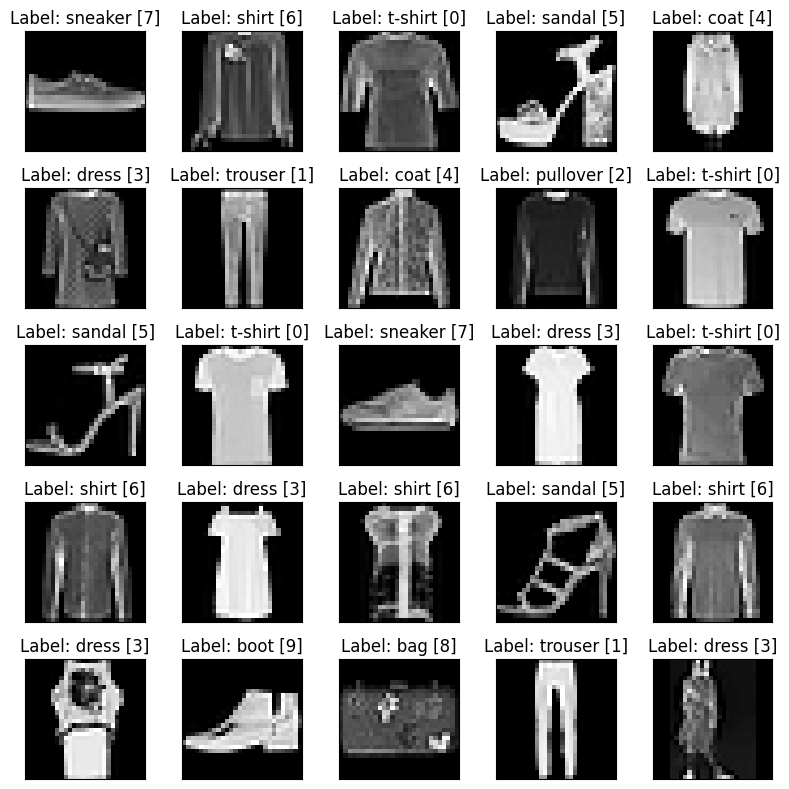

In [ ]:
#output of the dataset is a PIL image but it can be easily converted to a numpy array ot to a tensor object
label_names = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt',
             'sneaker','bag','boot']
fig, axs = plt.subplots(5,5, figsize=(8,8))
for ax in axs.flatten():
  img, label = random.choice(train_dataset)
  ax.imshow(np.array(img), cmap='gist_gray')
  ax.set_title(f'Label: {label_names[label]} [{label}]')
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()

In [ ]:
train_transform = transforms.Compose([transforms.ToTensor(),])
test_transform = transforms.Compose([transforms.ToTensor(),])


In [ ]:
#print(train_dataset)
print(train_dataset[0])
print(train_dataset[0][0])
print(train_dataset[0][1])

(<PIL.Image.Image image mode=L size=28x28 at 0x7F1A48D58490>, 9)
<PIL.Image.Image image mode=L size=28x28 at 0x7F1A48D58490>
9


In [ ]:
train_dataset.transform = train_transform
test_dataset.transform = test_transform

In [ ]:
print(train_dataset)
print(train_dataset[0])
print(train_dataset[0][0])
print(train_dataset[0][1])

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: dataset
    Split: Train
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000,

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=False)



In [ ]:
batch_data, batch_labels = next(iter(train_dataloader))
print('Train batch shape')
print(f'\t Data: {batch_data.shape}')
print(f'\t Labels: {batch_labels.shape}')

batch_data, batch_labels = next(iter(test_dataloader))
print('Test data shape')
print(f'\t Data: {batch_data.shape}')
print(f'\t Labels: {batch_labels.shape}')


Train batch shape
	 Data: torch.Size([256, 1, 28, 28])
	 Labels: torch.Size([256])
Test data shape
	 Data: torch.Size([256, 1, 28, 28])
	 Labels: torch.Size([256])


In [ ]:
class Encoder(nn.Module):
  def __init__(self, encoded_space_dim):
    super().__init__()
    #Encoder section
    self.encoder_cnn = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1, stride=2),
        nn.ReLU(True),
        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1, stride=2),
        nn.ReLU(True),
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=0, stride=2),
        nn.ReLU(True)
        )

    #Flatten layers cannot be placed in Sequential Modules in Pytorch
    self.flatten = nn.Flatten(start_dim=1) # Starts flattening from the second dimension (the first is the batch size)

    #Linear action
    self.encoder_lin = nn.Sequential(
        nn.Linear(in_features=3*3*32, out_features=64),
        nn.ReLU(True),
        nn.Linear(in_features=64, out_features=encoded_space_dim)
        )


  def forward(self, x):
    x = self.encoder_cnn(x)
    x = self.flatten(x)
    x = self.encoder_lin(x)
    return x

In [ ]:
#Different input dimensions can be convoluted to the same output dimension
input_t = torch.ones(1, 3, 5, 5)
conv = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=2)
print(f"Input size: {input_t.shape} Output size:{conv(input_t).shape}")


input_t = torch.ones(1, 3, 6, 6)
print(f"Input size: {input_t.shape} Output size:{conv(input_t).shape}")

Input size: torch.Size([1, 3, 5, 5]) Output size:torch.Size([1, 8, 2, 2])
Input size: torch.Size([1, 3, 6, 6]) Output size:torch.Size([1, 8, 2, 2])


In [ ]:
#output_padding parameter can define, given the convoluted input, the correct size for the deconvoluted output
input_t = torch.ones(1, 8, 2, 2)
conv_zero_out_pad = nn.ConvTranspose2d(in_channels=8, out_channels=3, kernel_size=3, stride=2, output_padding=0)
print(f"Input size: {input_t.shape} Output size:{conv_zero_out_pad(input_t).shape}")

conv_out_pad = nn.ConvTranspose2d(in_channels=8, out_channels=3, kernel_size=3, stride=2, output_padding=1)
print(f"Input size: {input_t.shape} Output size:{conv_out_pad(input_t).shape}")

Input size: torch.Size([1, 8, 2, 2]) Output size:torch.Size([1, 3, 5, 5])
Input size: torch.Size([1, 8, 2, 2]) Output size:torch.Size([1, 3, 6, 6])


In [ ]:
class Decoder(nn.Module):
  def __init__(self, encoded_space_dim):
    super().__init__()

    #Linear section
    self.decoder_lin = nn.Sequential(
        nn.Linear(in_features=encoded_space_dim, out_features=64),
        nn.ReLU(True),
        nn.Linear(in_features=64, out_features=3*3*32),
        nn.ReLU(True)
    )

    self.unflatten = nn.Unflatten(dim=1,unflattened_size=(32,3,3))

    self.decoder_cnn = nn.Sequential(
        nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, output_padding=0),
        nn.ReLU(True),
        nn.ConvTranspose2d(in_channels=16, out_channels=8, kernel_size=3, stride=2, padding=1, output_padding=1),
        nn.ReLU(True),
        nn.ConvTranspose2d(in_channels=8, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=1),
        nn.ReLU(True)
    )

  def forward(self, x):
    x = self.decoder_lin(x)
    x = self.unflatten(x)
    x = self.decoder_cnn(x)
    x = torch.sigmoid(x)  #Force the output value to be between 0 and 1
    return x



In [ ]:
torch.manual_seed(0)

encoded_space_dim=2
encoder = Encoder(encoded_space_dim=encoded_space_dim)
decoder = Decoder(encoded_space_dim=encoded_space_dim)



In [ ]:
#Take an input image (remeber to add the batch dimension)

img, _ = test_dataset[0]
img = img.unsqueeze(0) #Add the batch dimension to the first axis
#Encode the image
img_enc = encoder(img)
print('Encoded image shape', img_enc.shape)
#Decode the image
dec_img = decoder(img_enc)
print('Decoded image shape:', img.shape)



Encoded image shape torch.Size([1, 2])
Decoded image shape: torch.Size([1, 1, 28, 28])


In [ ]:
#Two alternatives:
#1) Optimize both encoder and decoder NN parameters with a single optimizer (Used here)
#2) Optimize Encoder with one optimizer and Decoder with another optimizer

loss_fn = torch.nn.MSELoss()
lr=5e-4

params_to_optimize = [{'params': encoder.parameters()}, {'params': decoder.parameters()}]

optim = torch.optim.Adam(params=params_to_optimize, lr=lr, weight_decay=1e-5)
#Check if GPU is available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

print(f'Selected device: {device}')
#Move both encoder and decoder to the selected device
encoder.to(device)
decoder.to(device)



Selected device: cuda


Decoder(
  (decoder_lin): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=288, bias=True)
    (3): ReLU(inplace=True)
  )
  (unflatten): Unflatten(dim=1, unflattened_size=(32, 3, 3))
  (decoder_cnn): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(8, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): ReLU(inplace=True)
  )
)

In [ ]:
#Training function: trains one epoch at time, loop only over mini_batches

def train_epoch(encoder, decoder, device, dataloader, loss_fn, optimizer):
  encoder.train()
  decoder.train()
  losses=[]

  for image_batch, _ in dataloader:
    image_batch = image_batch.to(device)
    encoded_data = encoder(image_batch)
    decoded_data = decoder(encoded_data)

    loss = loss_fn(decoded_data, image_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.detach().cpu().numpy())
  losses = np.mean(losses)
  return losses

In [ ]:
#Test set: MSE loss over the entire test set here represents our loss (not always true). Concatenating outputs and inputs we
# can evaluate the loss function over the entire test set

def test_epoch(encoder, decoder, device, dataloader, loss_fn):
  encoder.eval()
  decoder.eval()
  with torch.no_grad():
    conc_out=[]
    conc_label=[]
    for image_batch, _ in dataloader:
      image_batch = image_batch.to(device)
      encoded_data = encoder(image_batch)
      decoded_data = decoder(encoded_data)

      conc_out.append(decoded_data.cpu())
      conc_label.append(image_batch.cpu())

    #Create a single tensor with concatenated outputs
    conc_out = torch.cat(conc_out)
    conc_label = torch.cat(conc_label)
    val_loss = loss_fn(conc_out, conc_label)
  return val_loss.data

EPOCH 1/10
Train-Epoch 1/10 -loss 0.17135551571846008
Validation-Epoch 1/10 - loss 0.16891951858997345


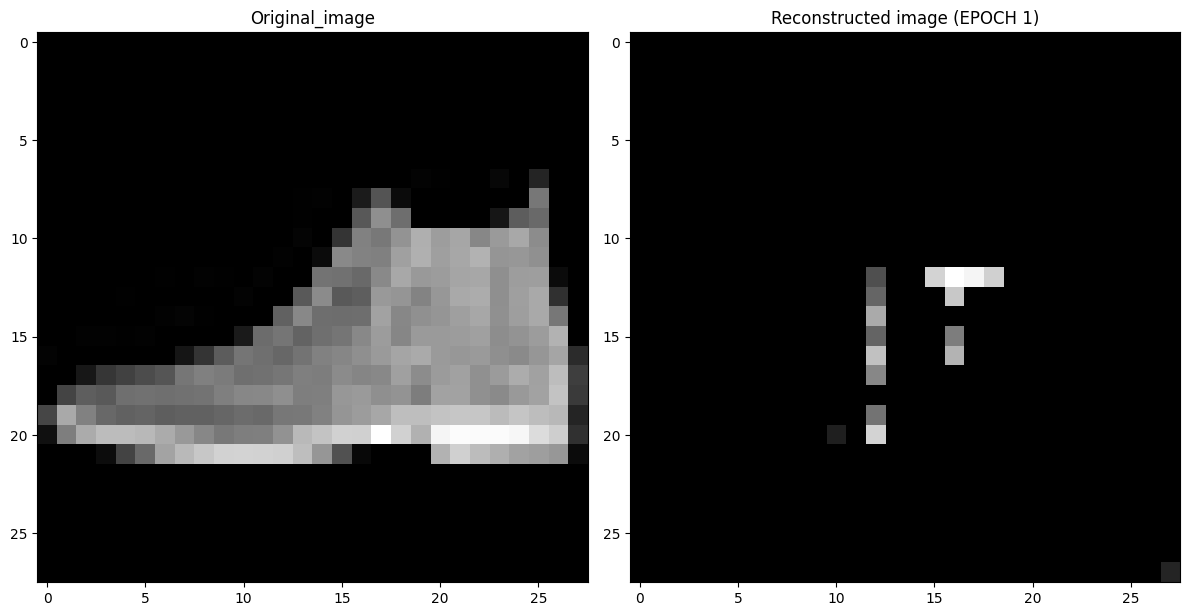

EPOCH 2/10
Train-Epoch 2/10 -loss 0.16771960258483887
Validation-Epoch 2/10 - loss 0.16038884222507477


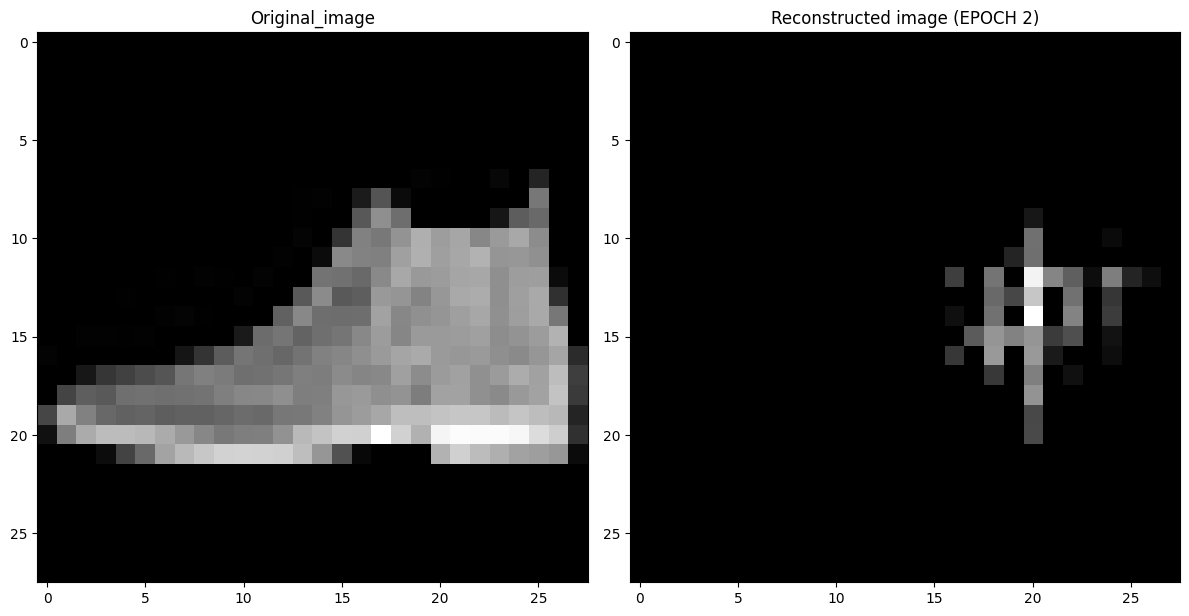

EPOCH 3/10
Train-Epoch 3/10 -loss 0.15746410191059113
Validation-Epoch 3/10 - loss 0.1548309624195099


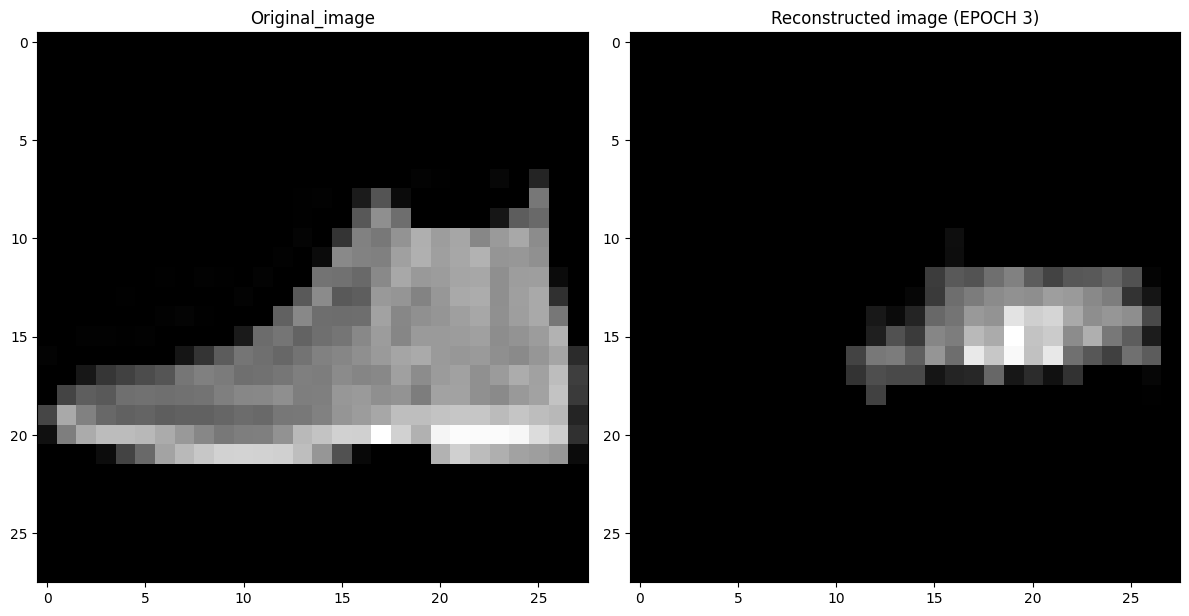

EPOCH 4/10
Train-Epoch 4/10 -loss 0.15524528920650482
Validation-Epoch 4/10 - loss 0.15434955060482025


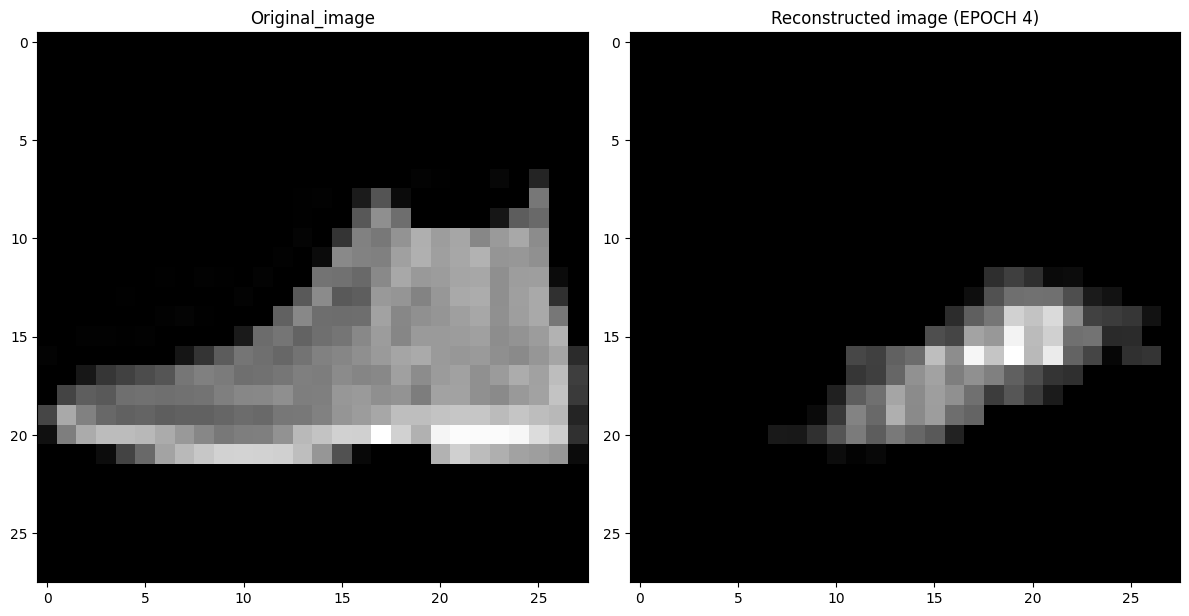

EPOCH 5/10
Train-Epoch 5/10 -loss 0.15485268831253052
Validation-Epoch 5/10 - loss 0.15404044091701508


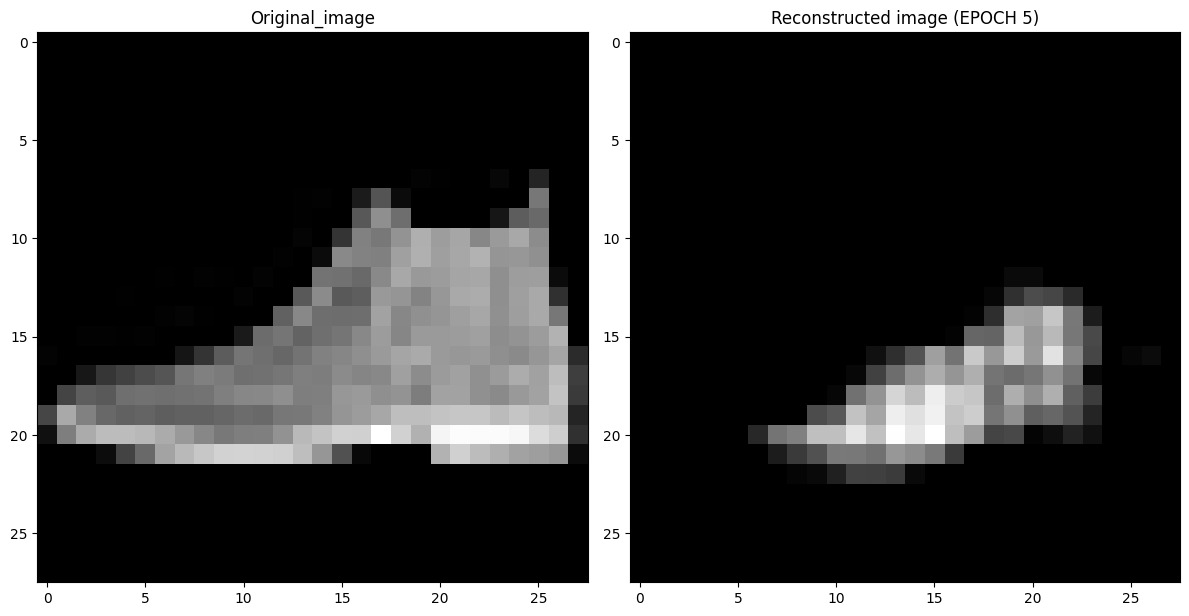

EPOCH 6/10
Train-Epoch 6/10 -loss 0.1545819193124771
Validation-Epoch 6/10 - loss 0.15385392308235168


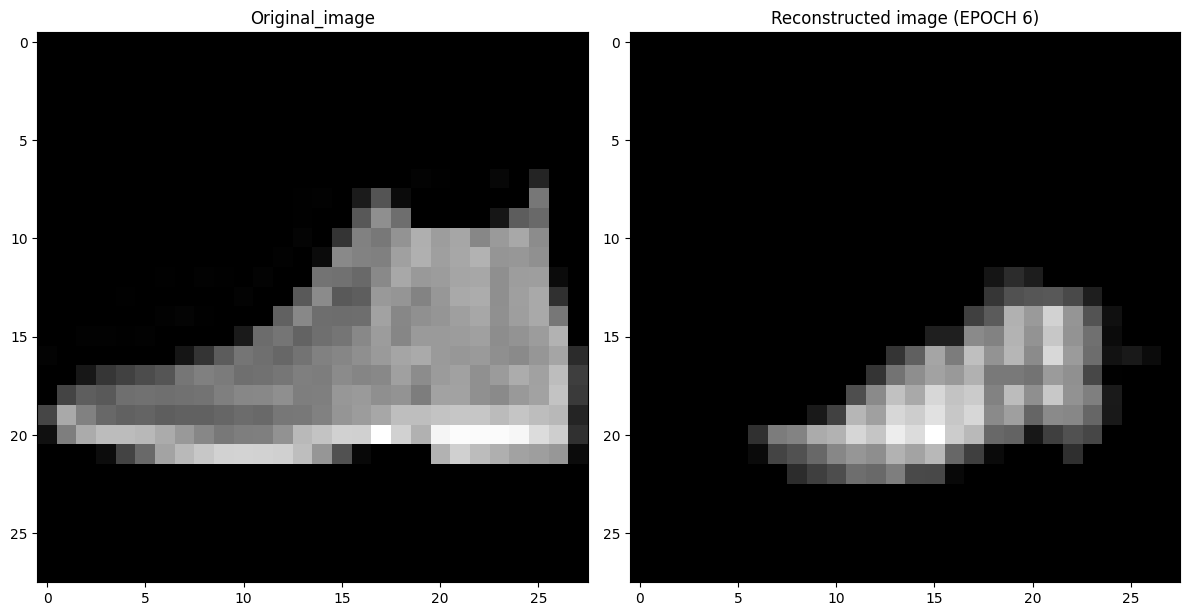

EPOCH 7/10
Train-Epoch 7/10 -loss 0.15435288846492767
Validation-Epoch 7/10 - loss 0.15362359583377838


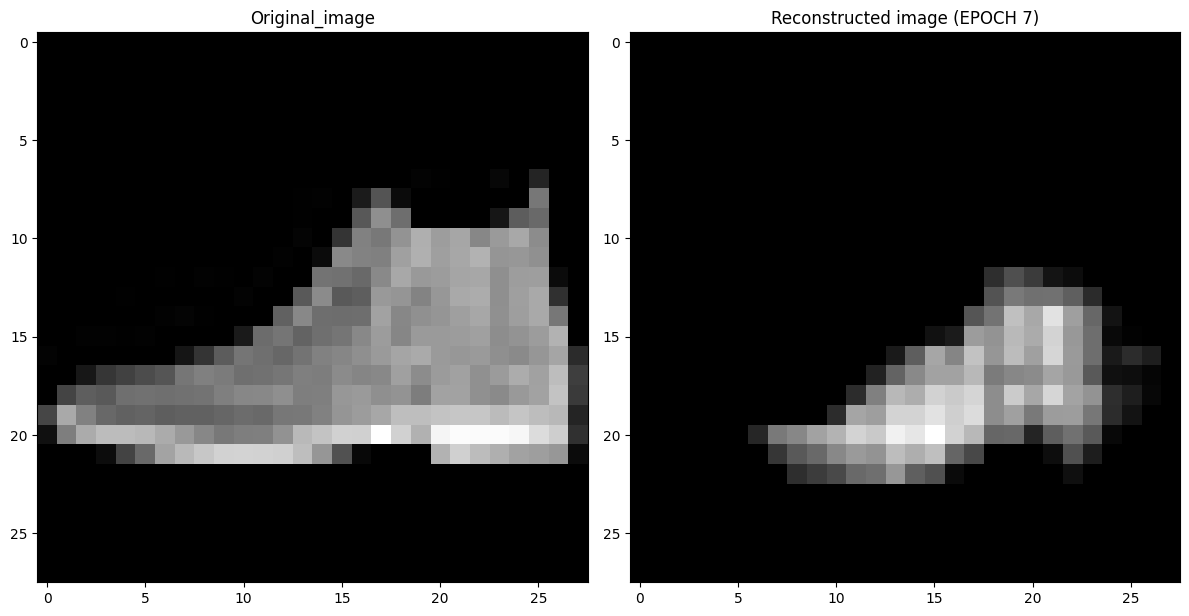

EPOCH 8/10
Train-Epoch 8/10 -loss 0.15417727828025818
Validation-Epoch 8/10 - loss 0.15354236960411072


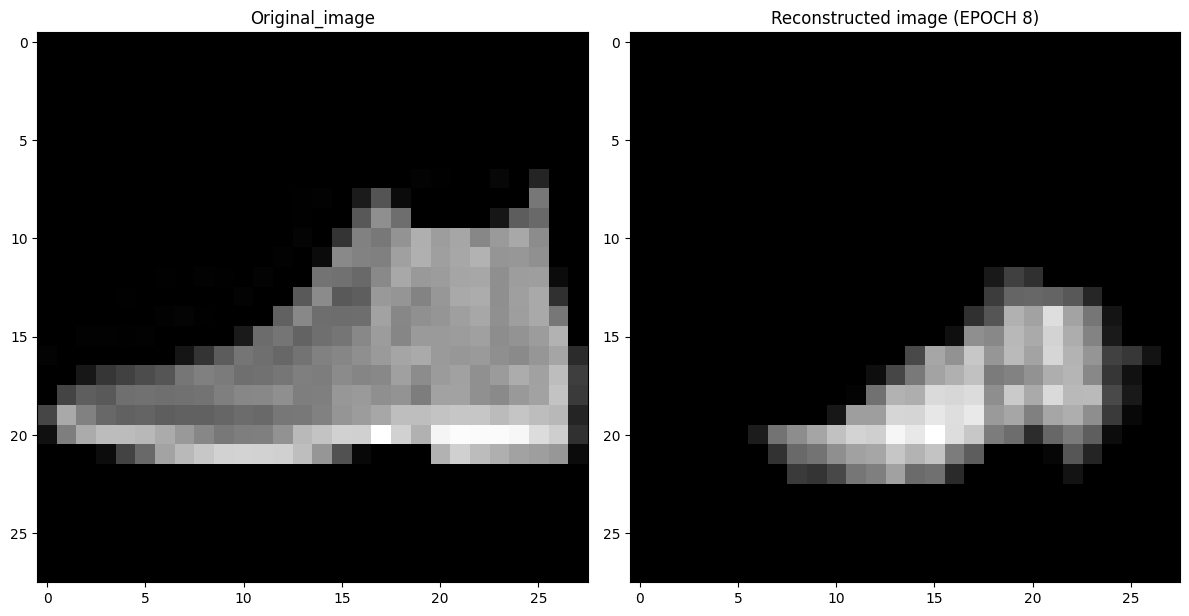

EPOCH 9/10
Train-Epoch 9/10 -loss 0.15403884649276733
Validation-Epoch 9/10 - loss 0.1533840447664261


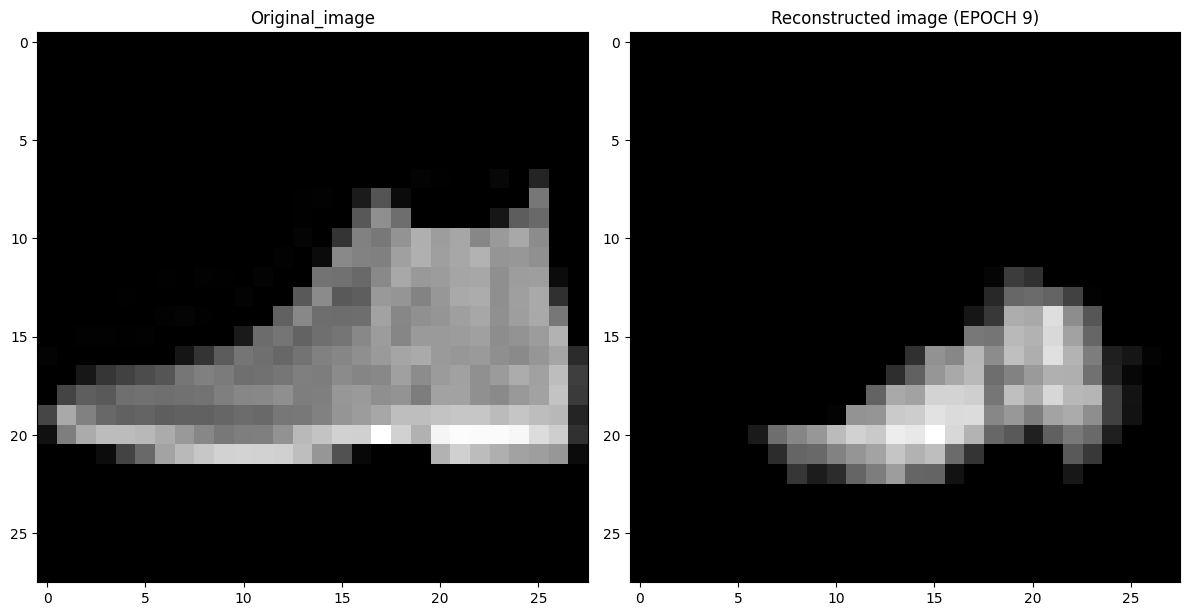

EPOCH 10/10
Train-Epoch 10/10 -loss 0.15392069518566132
Validation-Epoch 10/10 - loss 0.1532113254070282


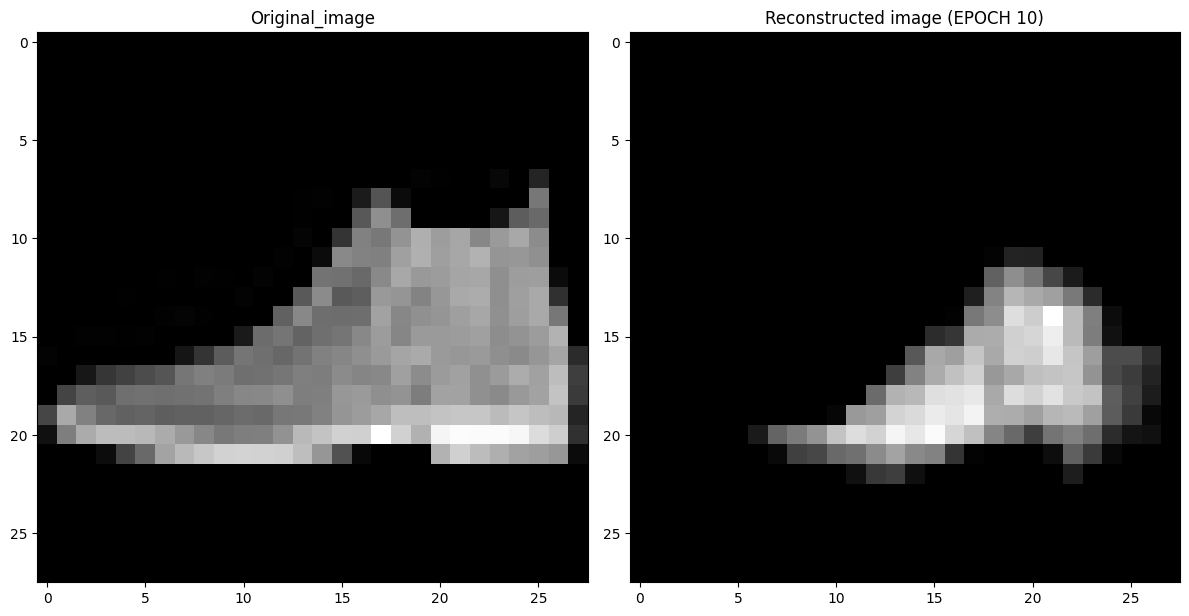

In [ ]:
#Training
num_epochs=10

for epoch in range(num_epochs):
  print('EPOCH %d/%d' % (epoch+1, num_epochs))
  train_loss = train_epoch(
      encoder=encoder,
      decoder=decoder,
      device=device,
      dataloader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optim
      )
  print(f'Train-Epoch {epoch+1}/{num_epochs} -loss {train_loss}')
  val_loss = test_epoch(
      encoder=encoder,
      decoder=decoder,
      device=device,
      dataloader=test_dataloader,
      loss_fn=loss_fn
      )
  print(f'Validation-Epoch {epoch+1}/{num_epochs} - loss {val_loss}')

  #get the output of a specific image (i.e. index 0)
  img = test_dataset[0][0].unsqueeze(0).to(device)
  encoder.eval()
  decoder.eval()
  with torch.no_grad():
    rec_img = decoder(encoder(img))
  #Plot the reconstructed image
  fig, axs = plt.subplots(1, 2, figsize=(12,6))
  axs[0].imshow(img.cpu().squeeze().numpy(), cmap='gist_gray')
  axs[0].set_title('Original_image')
  axs[1].imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')
  axs[1].set_title('Reconstructed image (EPOCH %d)' % (epoch+1))
  plt.tight_layout()
  plt.pause(0.1)

  os.makedirs('autoencoder_progress_%d_features' % encoded_space_dim, exist_ok=True)
  fig.savefig('autoencoder_progress_%d_features/epoch_%d.jpg' % (encoded_space_dim, epoch+1))

  plt.show()
  plt.close()
  #Save network parameters
  torch.save(encoder.state_dict(), 'encoder_params.pth')
  torch.save(decoder.state_dict(), 'decoder_params.pth')




In [ ]:
#Load Network parameters
encoder.load_state_dict(torch.load('encoder_params.pth'))
decoder.load_state_dict(torch.load('decoder_params.pth'))


<ipython-input-22-70bd81508b97>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load('encoder_params.pth'))
<ipython-input-22-70bd81508b97>:3:

<All keys matched successfully>

In [ ]:
#Get the encoded representation of the test image
encoded_samples = []
for sample in tqdm(test_dataset):
  img = sample[0].unsqueeze(0).to(device)
  label = sample[1]

  encoder.eval()
  with torch.no_grad():
    encoded_img = encoder(img)
  encoded_img = encoded_img.flatten().cpu().numpy()
  encoded_sample = {f'Enc. Variable {i}': enc for i, enc in enumerate(encoded_img)}
  encoded_sample['label'] = label
  encoded_samples.append(encoded_sample)


100%|██████████| 10000/10000 [00:06<00:00, 1432.04it/s]


In [ ]:
encoded_samples = pd.DataFrame(encoded_samples)
encoded_samples

,Enc. Variable 0,Enc. Variable 1,label
0,3.667147,-5.150409,9
1,-15.573104,-27.990297,2
2,-16.722382,5.060892,1
3,-8.683104,0.811115,1
4,-0.918508,-0.766976,6
...,...,...,...
9995,11.019042,-14.921629,9
9996,-2.448386,0.284662,1
9997,-1.505749,-4.236550,8
9998,-11.654076,0.184339,1


In [ ]:
import plotly.express as px
px.scatter(encoded_samples, x='Enc. Variable 0', y='Enc. Variable 1', color=[label_names[l] for l in encoded_samples.label.to_numpy()], opacity=0.7)

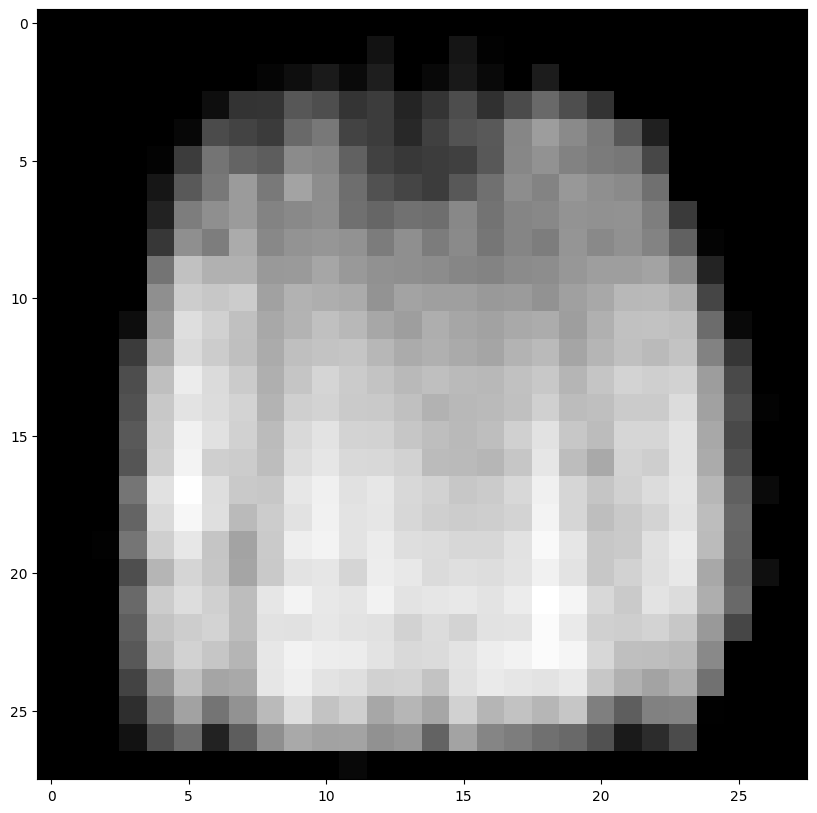

In [ ]:
#Generate images from a custom encoded value
if encoded_space_dim==2:
  custom_generated_sample = [-6., -30.0]
  encoded_value = torch.tensor(custom_generated_sample).float().unsqueeze(0).to(device)
  decoder.eval()
  with torch.no_grad():
    generated_img = decoder(encoded_value)

  plt.figure(figsize=(12,10))
  plt.imshow(generated_img.squeeze().cpu().numpy(), cmap='gist_gray')
  plt.show()

Selected device cuda
Epoch 110
Train epoch 1/10 - loss 0.17038747668266296 

Validation - epoch 1/10 - loss 0.1696501076221466


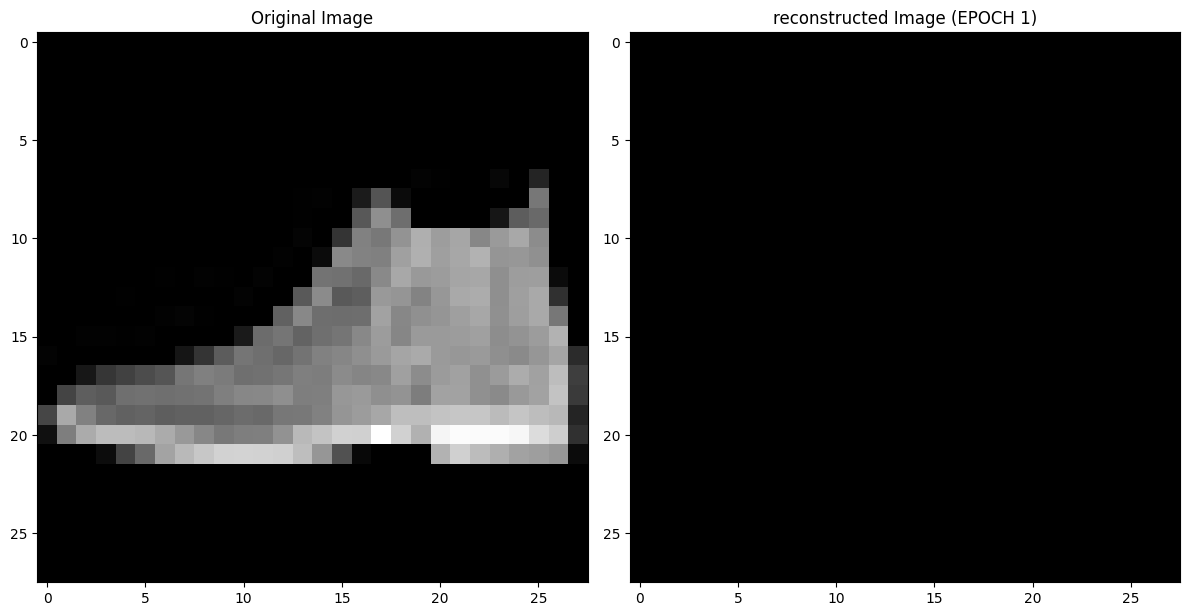

Epoch 210
Train epoch 2/10 - loss 0.17040976881980896 

Validation - epoch 2/10 - loss 0.1696501076221466


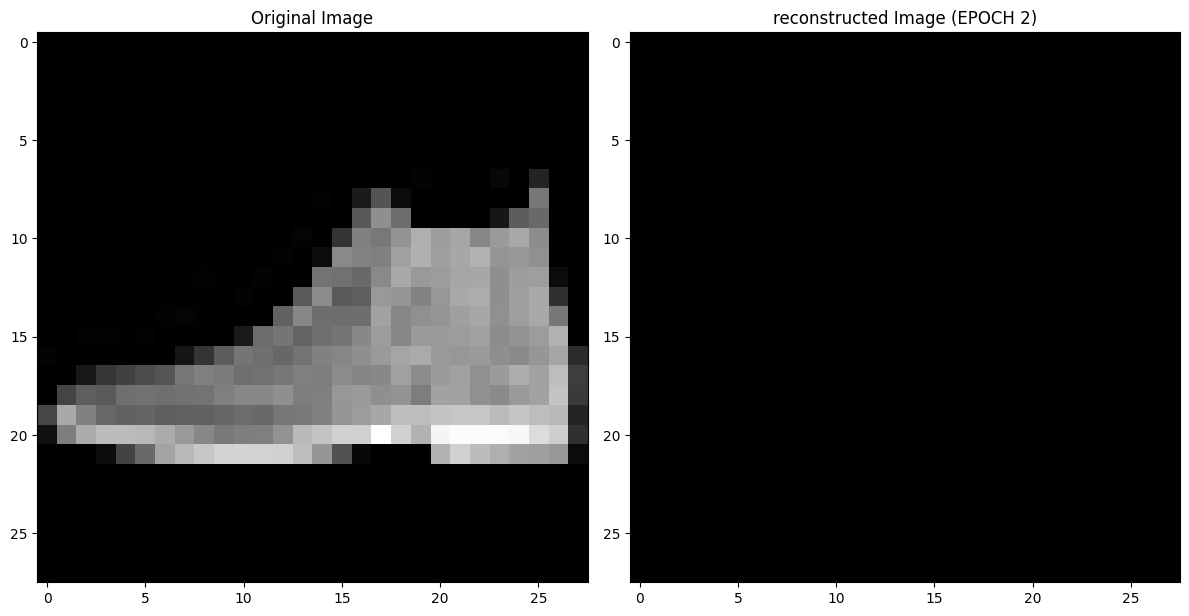

Epoch 310
Train epoch 3/10 - loss 0.17040307819843292 

Validation - epoch 3/10 - loss 0.1696501076221466


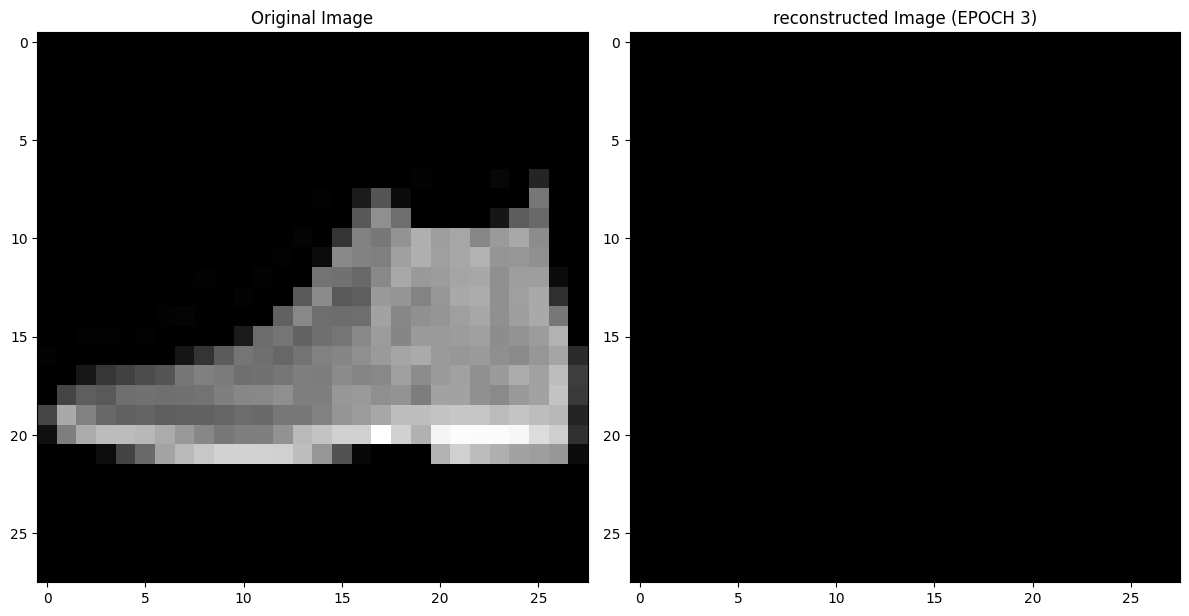

Epoch 410
Train epoch 4/10 - loss 0.1704082041978836 

Validation - epoch 4/10 - loss 0.1696501076221466


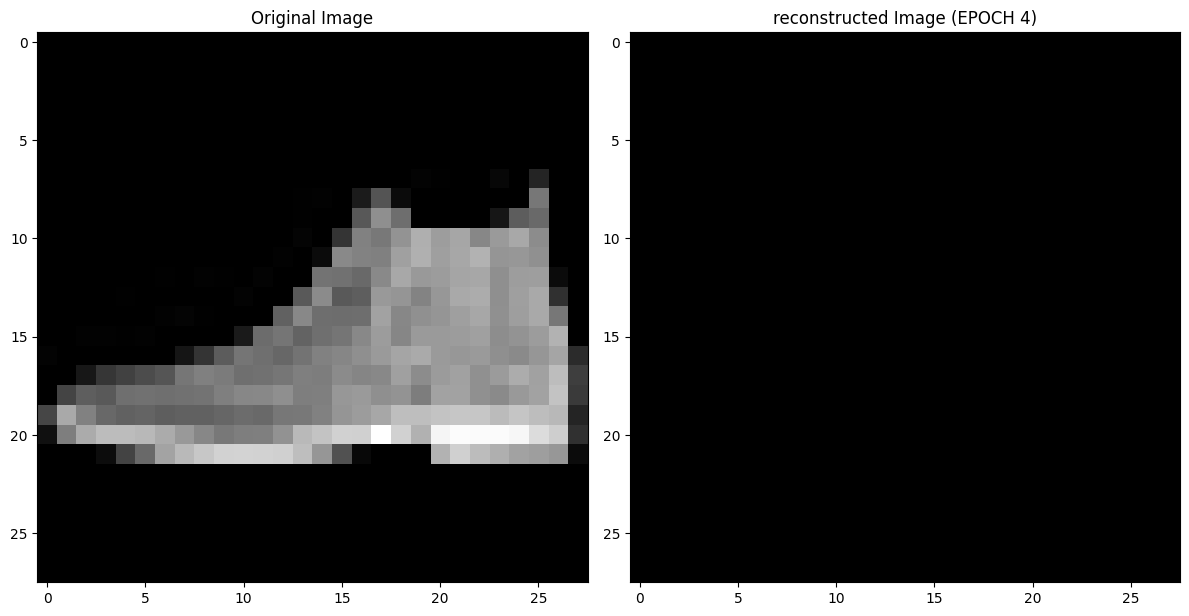

Epoch 510
Train epoch 5/10 - loss 0.1703995019197464 

Validation - epoch 5/10 - loss 0.1696501076221466


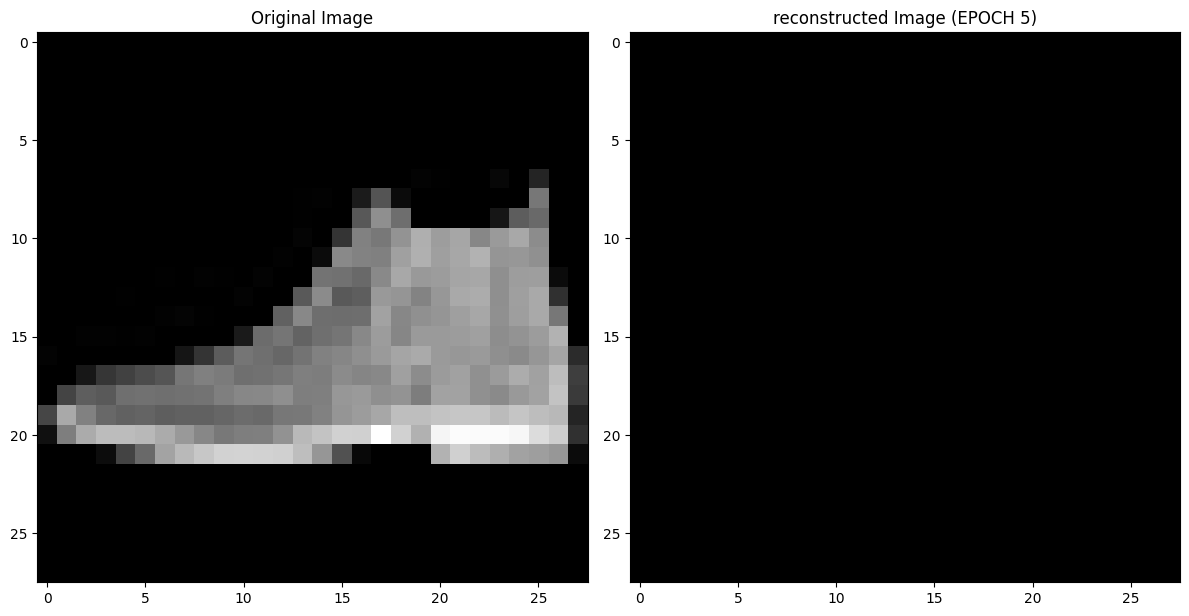

Epoch 610
Train epoch 6/10 - loss 0.17039841413497925 

Validation - epoch 6/10 - loss 0.1696501076221466


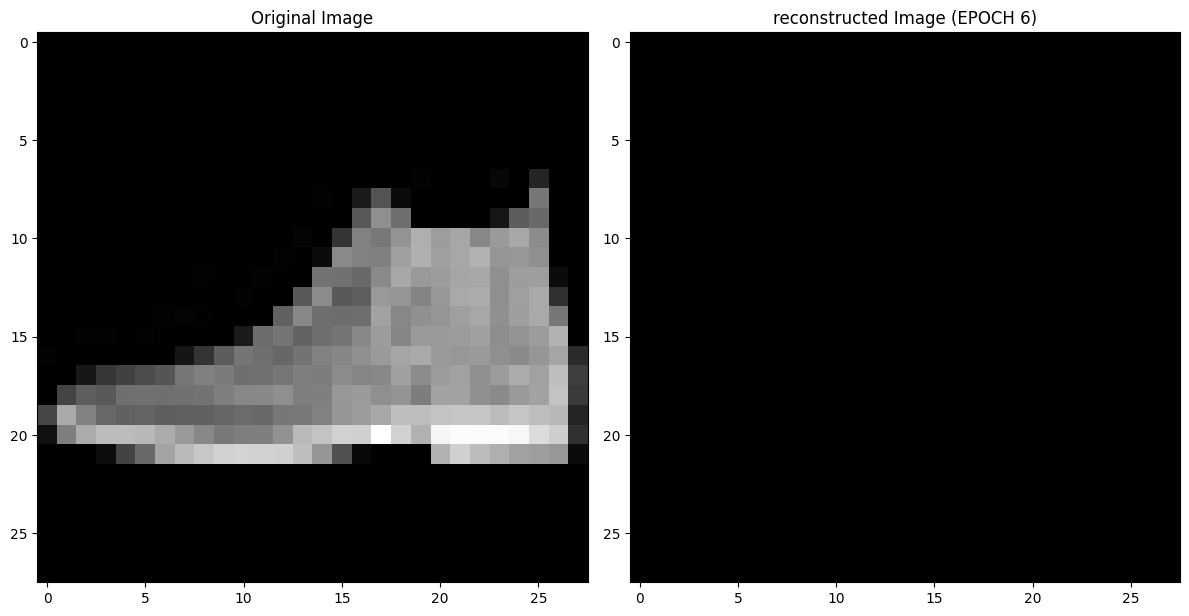

Epoch 710
Train epoch 7/10 - loss 0.17041537165641785 

Validation - epoch 7/10 - loss 0.1696501076221466


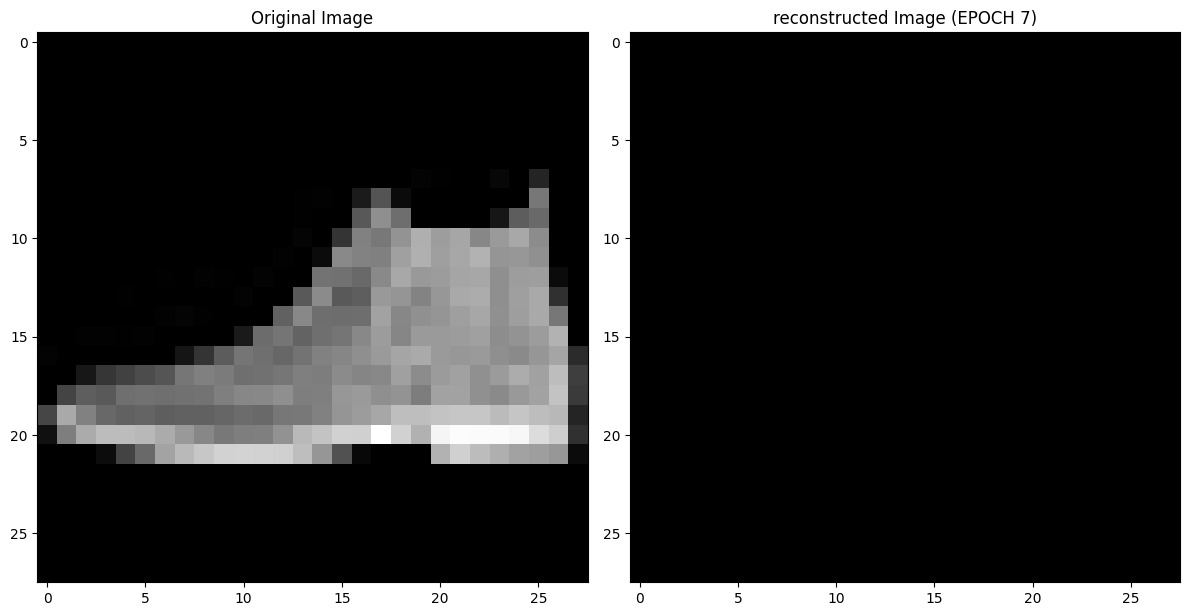

Epoch 810
Train epoch 8/10 - loss 0.17039784789085388 

Validation - epoch 8/10 - loss 0.1696501076221466


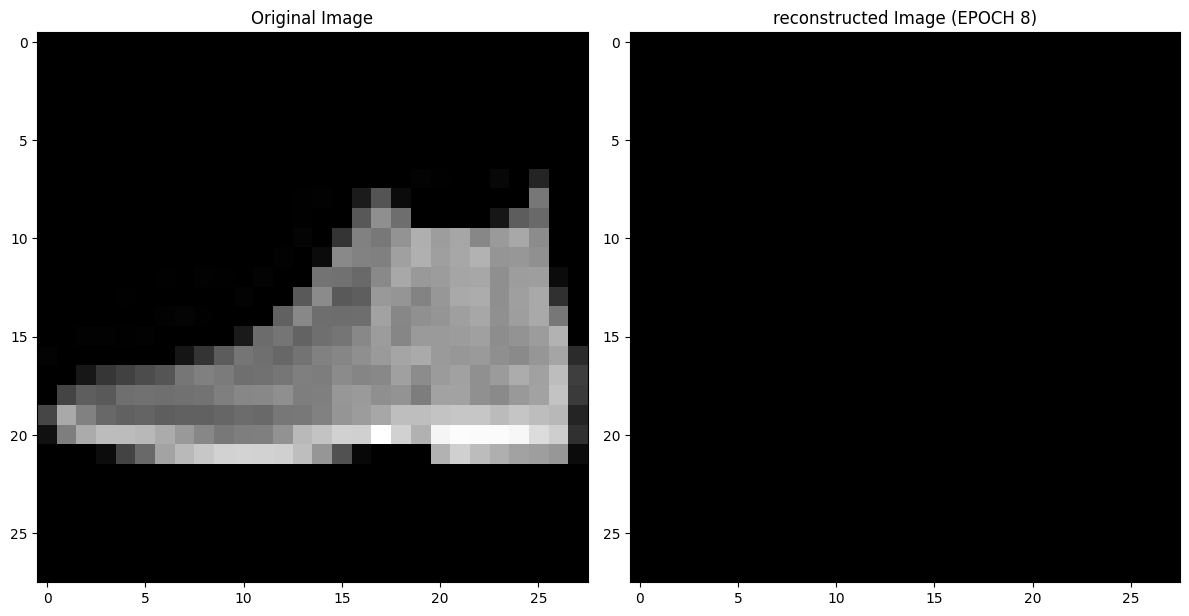

Epoch 910
Train epoch 9/10 - loss 0.17041566967964172 

Validation - epoch 9/10 - loss 0.1696501076221466


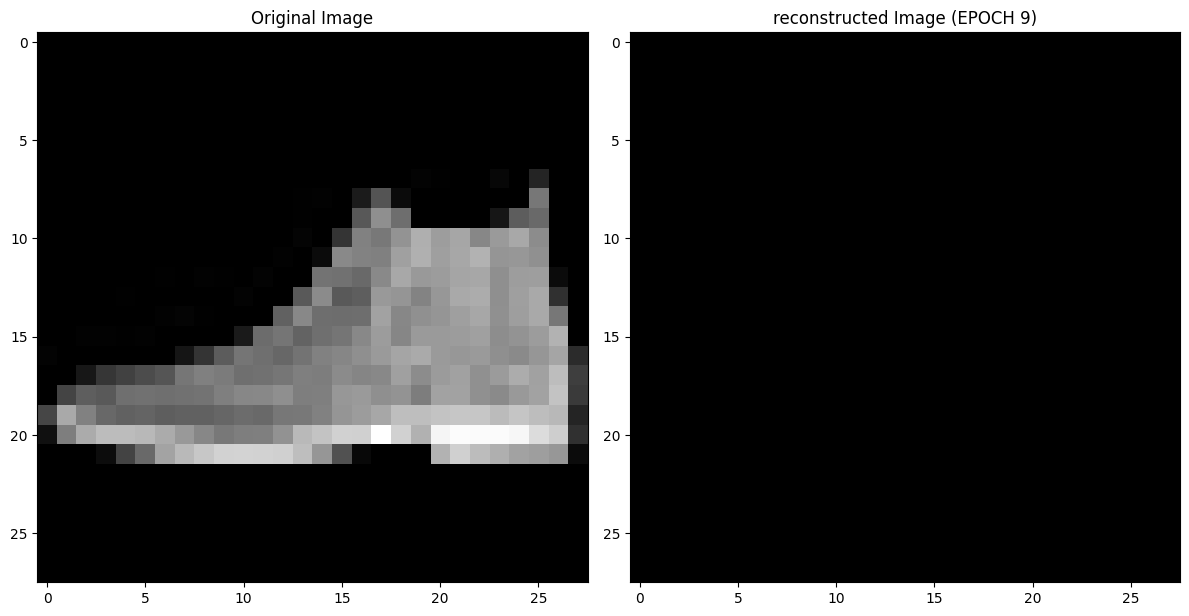

Epoch 1010
Train epoch 10/10 - loss 0.1704101711511612 

Validation - epoch 10/10 - loss 0.1696501076221466


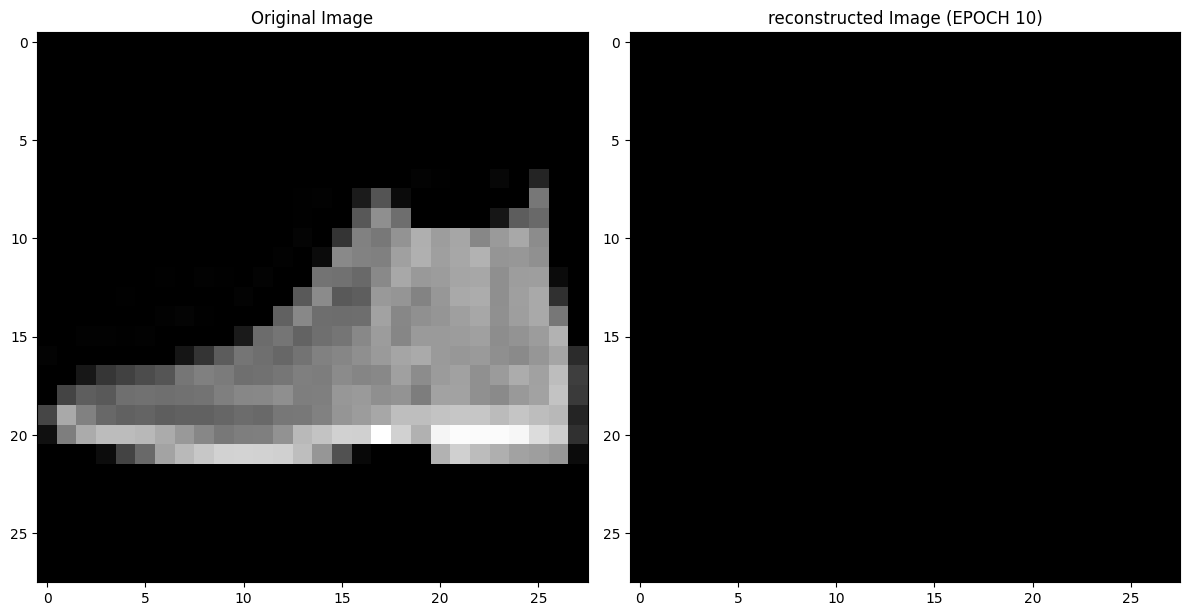

In [ ]:
#Encoded dimension equal to 10
torch.manual_seed(0)
encoded_space_dim=10
encoder = Encoder(encoded_space_dim=encoded_space_dim)
decoder = Decoder(encoded_space_dim=encoded_space_dim)

loss_fn = torch.nn.MSELoss()
lr=5e-4
params_to_optimize = [
    {'params': encoder.parameters()},
    {'params': decoder.parameters()}
    ]

optim = torch.optim.Adam(params=params_to_optimize, lr=lr, weight_decay=1e-5)
#Check if GPU is available
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
print(f'Selected device {device}')

encoder.to(device)
decoder.to(device)

num_epochs = 10
for epoch in range(num_epochs):
  #Train
  print('Epoch %d%d' % (epoch+1, num_epochs))
  train_loss = train_epoch(
      encoder=encoder,
      decoder=decoder,
      device=device,
      dataloader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optim
      )
  print(f'Train epoch {epoch+1}/{num_epochs} - loss {train_loss} \n')
  #Validation
  val_loss = test_epoch(
      encoder=encoder,
      decoder=decoder,
      device=device,
      dataloader=test_dataloader,
      loss_fn=loss_fn
      )
  print(f'Validation - epoch {epoch+1}/{num_epochs} - loss {val_loss}')

  img = test_dataset[0][0].unsqueeze(0).to(device)
  encoder.eval()
  decoder.eval()
  with torch.no_grad():
    rec_img = decoder(encoder(img))
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))
  axs[0].imshow(img.cpu().squeeze().numpy(), cmap='gist_gray')
  axs[0].set_title('Original Image')
  axs[1].imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')
  axs[1].set_title('reconstructed Image (EPOCH %d)' % (epoch+1))
  plt.tight_layout()
  plt.pause(0.1)

  os.makedirs('autoencoder_progress_%d_features' % encoded_space_dim, exist_ok=True)
  fig.savefig('autoencoder_progress_%d_features/epoch_%d.jpg' % (encoded_space_dim, epoch+1))
  plt.show()
  plt.close()



In [ ]:
#Get the encoded representations of the test samples
encoded_samples = []
for sample in tqdm(test_dataset):
  img = sample[0].unsqueeze(0).to(device)
  label = sample[1]

  encoder.eval()
  with torch.no_grad():
    encoded_img = encoder(img)
  encoded_img = encoded_img.flatten().cpu().numpy()
  encoded_sample = {f'Enc. Variable {i}': enc  for i, enc in  enumerate(encoded_img)}
  encoded_sample['label'] = label
  encoded_samples.append(encoded_sample)

encoded_samples = pd.DataFrame(encoded_samples)
encoded_samples

100%|██████████| 10000/10000 [00:07<00:00, 1350.06it/s]


,Enc. Variable 0,Enc. Variable 1,Enc. Variable 2,Enc. Variable 3,Enc. Variable 4,Enc. Variable 5,Enc. Variable 6,Enc. Variable 7,Enc. Variable 8,Enc. Variable 9,label
0,-5.028377e-40,4.909715e-40,5.451654e-40,4.909015e-40,5.028349e-40,-2.662481e-37,-6.541969e-30,-5.338644e-34,5.071902e-40,6.641454e-40,9
1,-5.028377e-40,4.909715e-40,5.451654e-40,4.909015e-40,5.028349e-40,-2.662481e-37,-6.541969e-30,-5.338644e-34,5.071902e-40,6.641454e-40,2
2,-5.028377e-40,4.909715e-40,5.451654e-40,4.909015e-40,5.028349e-40,-2.662481e-37,-6.541969e-30,-5.338644e-34,5.071902e-40,6.641454e-40,1
3,-5.028377e-40,4.909715e-40,5.451654e-40,4.909015e-40,5.028349e-40,-2.662481e-37,-6.541969e-30,-5.338644e-34,5.071902e-40,6.641454e-40,1
4,-5.028377e-40,4.909715e-40,5.451654e-40,4.909015e-40,5.028349e-40,-2.662481e-37,-6.541969e-30,-5.338644e-34,5.071902e-40,6.641454e-40,6
...,...,...,...,...,...,...,...,...,...,...,...
9995,-5.028377e-40,4.909715e-40,5.451654e-40,4.909015e-40,5.028349e-40,-2.662481e-37,-6.541969e-30,-5.338644e-34,5.071902e-40,6.641454e-40,9
9996,-5.028377e-40,4.909715e-40,5.451654e-40,4.909015e-40,5.028349e-40,-2.662481e-37,-6.541969e-30,-5.338644e-34,5.071902e-40,6.641454e-40,1
9997,-5.028377e-40,4.909715e-40,5.451654e-40,4.909015e-40,5.028349e-40,-2.662481e-37,-6.541969e-30,-5.338644e-34,5.071902e-40,6.641454e-40,8
9998,-5.028377e-40,4.909715e-40,5.451654e-40,4.909015e-40,5.028349e-40,-2.662481e-37,-6.541969e-30,-5.338644e-34,5.071902e-40,6.641454e-40,1


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
encoded_samples_reduced_PCA = pca.fit_transform(encoded_samples)
encoded_samples_reduced_PCA

array([[ 4.50000000e+00, -4.27642354e-50],
       [-2.50000000e+00, -4.27642354e-50],
       [-3.50000000e+00, -4.27642354e-50],
       ...,
       [ 3.50000000e+00, -4.27642354e-50],
       [-3.50000000e+00, -4.27642354e-50],
       [ 5.00000000e-01, -4.27642354e-50]])

In [ ]:
encoded_samples_reduced_PCA = pd.DataFrame({'Enc. Variable 0': encoded_samples_reduced_PCA[:,0],
                                            'Enc. Variable 1': encoded_samples_reduced_PCA[:,1],
                                            'label': encoded_samples.label})

px.scatter(encoded_samples_reduced_PCA, x='Enc. Variable 0', y='Enc. Variable 1', color=[label_names[l] for l in encoded_samples.label.to_numpy()], opacity=0.7)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, init='random', learning_rate='auto', perplexity=30)
encoded_samples_reduced_TSNE = tsne.fit_transform(encoded_samples)
encoded_samples_reduced_TSNE = pd.DataFrame({'Enc. Variable 0': encoded_samples_reduced_TSNE[:,0],
                                             'Enc. Variable 1': encoded_samples_reduced_TSNE[:, 1],
                                             'label': encoded_samples.label})
px.scatter(encoded_samples_reduced_TSNE, x='Enc. Variable 0', y='Enc. Variable 1', color=[label_names[l] for l in encoded_samples.label.to_numpy()], opacity=0.7)


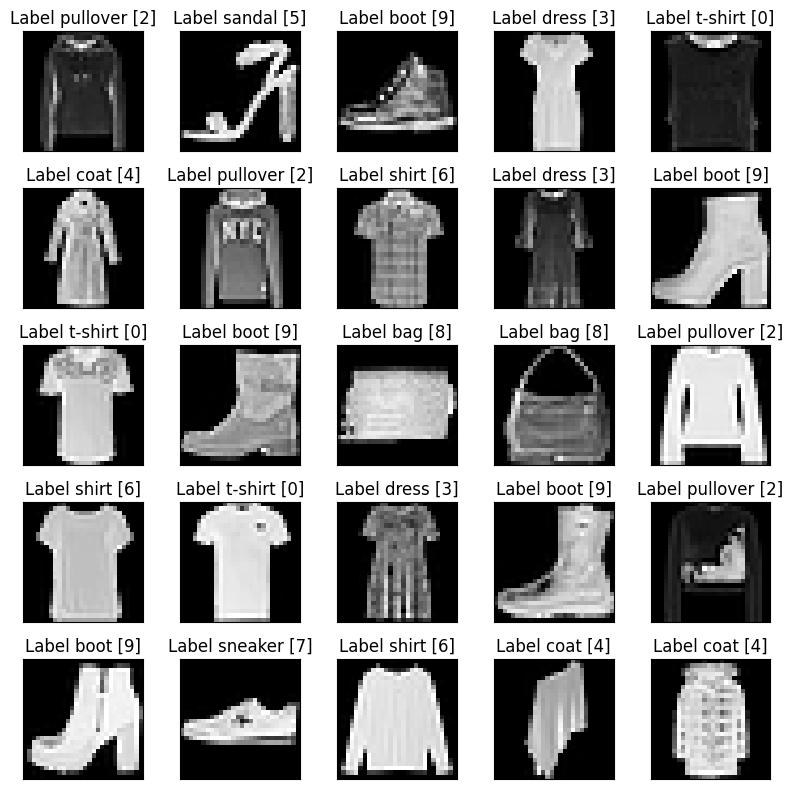

In [ ]:
#Plot some sample
label_names = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt',
             'sneaker','bag','boot']
fig, axs = plt.subplots(5, 5, figsize=(8,8))
for ax in axs.flatten():
  img, label = random.choice(train_dataset)
  ax.imshow(np.array(img.permute(1,2,0).repeat(1,1,3)), cmap='gist_gray')
  ax.set_title(f'Label {label_names[label]} [{label}]')
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()

In [ ]:
#Since the latent representations produced by the encoder are usually clustered according to the corresponding labels,
#we can use these latent features to solve a classification problem
#Train the encoder to obtain the encoded features
#Train the classifier to label the data starting from the encoded data
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split


In [ ]:
class AEDataset(Dataset):

  def __init__(self, encoder, normal_dataloader, device):
    encoder = encoder.to(device)
    self.x=[]
    self.y=[]
    self.latents = []
    for x, y in normal_dataloader:
      self.x.append(x)
      self.y.append(y)
      x = x.to(device)
      y = y.to(device)
      latents = encoder(x).detach().cpu()
      self.latents.append(latents)

    self.x = torch.cat(self.x, axis=0)
    self.y = torch.cat(self.y, axis=0)
    self.latents = torch.cat(self.latents, axis=0)
    self.x, _, self.latents, _, self.y, _ = train_test_split(self.x, self.latents, self.y, train_size=0.01, stratify=self.y)

  def __len__(self):
    return len(self.x)
  def __getitem__(self, idx):
    return self.x[idx], self.latents[idx], self.y[idx]

In [ ]:
class SimpleClassifier(nn.Module):
  def __init__(self, encoded_space_dim):
    super().__init__()
    self.classifier = nn.Sequential(
        nn.Linear(encoded_space_dim, 128),
        nn.ReLU(True),
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = self.classifier(x)
    return x



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
torch.manual_seed(0)
model = SimpleClassifier(encoded_space_dim)
train_dataloader_latents = DataLoader(AEDataset(encoder, train_dataloader, device), batch_size=32, shuffle=True)
loss_fn = torch.nn.CrossEntropyLoss()
lr=5e-4
optim = torch.optim.Adam(model.parameters(), lr=lr)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

model.to(device)


num_epochs=100
val_losses_enc=[]
val_accs_enc=[]
for epoch in range(num_epochs):
  print('EPOCH %d/%d' % (epoch + 1, num_epochs))
  model.train()
  for x, latents, y in tqdm(train_dataloader_latents):
    latents = latents.to(device)
    y = y.to(device)
    y_pred = model(latents)
    loss = loss_fn(y_pred, y)
    optim.zero_grad()
    loss.backward()
    optim.step()

  model.eval()
  encoder.eval()
  with torch.no_grad():
    conc_out=[]
    conc_label=[]
    for image_batch, y in test_dataloader:
      image_batch = image_batch.to(device)
      encoded_data = encoder(image_batch)
      y_pred = model(encoded_data)
      conc_out.append(y_pred.cpu())
      conc_label.append(y)
    conc_out = torch.cat(conc_out)
    conc_label = torch.cat(conc_label)
    val_loss = loss_fn(conc_out, conc_label)
    val_acc = accuracy_score(conc_label, conc_out.softmax(axis=1).argmax(axis=1))
    val_losses_enc.append(val_loss)
    val_accs_enc.append(val_acc)
  print(f'\t VALIDATION - EPOCH {epoch + 1}/{num_epochs} - loss: {val_loss} - acc {val_acc}')




Selected device: cuda
EPOCH 1/100


100%|██████████| 19/19 [00:00<00:00, 172.91it/s]


	 VALIDATION - EPOCH 1/100 - loss: 2.30374813079834 - acc 0.1
EPOCH 2/100


100%|██████████| 19/19 [00:00<00:00, 588.31it/s]


	 VALIDATION - EPOCH 2/100 - loss: 2.3031539916992188 - acc 0.1
EPOCH 3/100


100%|██████████| 19/19 [00:00<00:00, 609.65it/s]


	 VALIDATION - EPOCH 3/100 - loss: 2.3029398918151855 - acc 0.1
EPOCH 4/100


100%|██████████| 19/19 [00:00<00:00, 604.13it/s]


	 VALIDATION - EPOCH 4/100 - loss: 2.3029139041900635 - acc 0.1
EPOCH 5/100


100%|██████████| 19/19 [00:00<00:00, 612.99it/s]


	 VALIDATION - EPOCH 5/100 - loss: 2.302778482437134 - acc 0.1
EPOCH 6/100


100%|██████████| 19/19 [00:00<00:00, 563.07it/s]


	 VALIDATION - EPOCH 6/100 - loss: 2.3027048110961914 - acc 0.1
EPOCH 7/100


100%|██████████| 19/19 [00:00<00:00, 615.06it/s]


	 VALIDATION - EPOCH 7/100 - loss: 2.3026490211486816 - acc 0.1
EPOCH 8/100


100%|██████████| 19/19 [00:00<00:00, 620.89it/s]


	 VALIDATION - EPOCH 8/100 - loss: 2.3026466369628906 - acc 0.1
EPOCH 9/100


100%|██████████| 19/19 [00:00<00:00, 611.89it/s]


	 VALIDATION - EPOCH 9/100 - loss: 2.3026351928710938 - acc 0.1
EPOCH 10/100


100%|██████████| 19/19 [00:00<00:00, 552.83it/s]


	 VALIDATION - EPOCH 10/100 - loss: 2.302619218826294 - acc 0.1
EPOCH 11/100


100%|██████████| 19/19 [00:00<00:00, 614.92it/s]


	 VALIDATION - EPOCH 11/100 - loss: 2.302628517150879 - acc 0.1
EPOCH 12/100


100%|██████████| 19/19 [00:00<00:00, 447.48it/s]


	 VALIDATION - EPOCH 12/100 - loss: 2.3026034832000732 - acc 0.1
EPOCH 13/100


100%|██████████| 19/19 [00:00<00:00, 414.04it/s]


	 VALIDATION - EPOCH 13/100 - loss: 2.302603006362915 - acc 0.1
EPOCH 14/100


100%|██████████| 19/19 [00:00<00:00, 572.81it/s]


	 VALIDATION - EPOCH 14/100 - loss: 2.3026013374328613 - acc 0.1
EPOCH 15/100


100%|██████████| 19/19 [00:00<00:00, 612.04it/s]


	 VALIDATION - EPOCH 15/100 - loss: 2.3026084899902344 - acc 0.1
EPOCH 16/100


100%|██████████| 19/19 [00:00<00:00, 600.62it/s]


	 VALIDATION - EPOCH 16/100 - loss: 2.302611827850342 - acc 0.1
EPOCH 17/100


100%|██████████| 19/19 [00:00<00:00, 603.04it/s]


	 VALIDATION - EPOCH 17/100 - loss: 2.3026158809661865 - acc 0.1
EPOCH 18/100


100%|██████████| 19/19 [00:00<00:00, 576.16it/s]


	 VALIDATION - EPOCH 18/100 - loss: 2.3025946617126465 - acc 0.1
EPOCH 19/100


100%|██████████| 19/19 [00:00<00:00, 571.44it/s]


	 VALIDATION - EPOCH 19/100 - loss: 2.302607536315918 - acc 0.1
EPOCH 20/100


100%|██████████| 19/19 [00:00<00:00, 596.17it/s]


	 VALIDATION - EPOCH 20/100 - loss: 2.302621603012085 - acc 0.1
EPOCH 21/100


100%|██████████| 19/19 [00:00<00:00, 577.47it/s]


	 VALIDATION - EPOCH 21/100 - loss: 2.3026342391967773 - acc 0.1
EPOCH 22/100


100%|██████████| 19/19 [00:00<00:00, 588.67it/s]


	 VALIDATION - EPOCH 22/100 - loss: 2.302595615386963 - acc 0.1
EPOCH 23/100


100%|██████████| 19/19 [00:00<00:00, 599.45it/s]


	 VALIDATION - EPOCH 23/100 - loss: 2.3025925159454346 - acc 0.1
EPOCH 24/100


100%|██████████| 19/19 [00:00<00:00, 573.72it/s]


	 VALIDATION - EPOCH 24/100 - loss: 2.3026106357574463 - acc 0.1
EPOCH 25/100


100%|██████████| 19/19 [00:00<00:00, 429.96it/s]


	 VALIDATION - EPOCH 25/100 - loss: 2.3025991916656494 - acc 0.1
EPOCH 26/100


100%|██████████| 19/19 [00:00<00:00, 579.02it/s]


	 VALIDATION - EPOCH 26/100 - loss: 2.302610397338867 - acc 0.1
EPOCH 27/100


100%|██████████| 19/19 [00:00<00:00, 582.29it/s]


	 VALIDATION - EPOCH 27/100 - loss: 2.3025994300842285 - acc 0.1
EPOCH 28/100


100%|██████████| 19/19 [00:00<00:00, 573.94it/s]


	 VALIDATION - EPOCH 28/100 - loss: 2.302600145339966 - acc 0.1
EPOCH 29/100


100%|██████████| 19/19 [00:00<00:00, 562.81it/s]


	 VALIDATION - EPOCH 29/100 - loss: 2.3025918006896973 - acc 0.1
EPOCH 30/100


100%|██████████| 19/19 [00:00<00:00, 571.25it/s]


	 VALIDATION - EPOCH 30/100 - loss: 2.3025996685028076 - acc 0.1
EPOCH 31/100


100%|██████████| 19/19 [00:00<00:00, 613.27it/s]


	 VALIDATION - EPOCH 31/100 - loss: 2.302607536315918 - acc 0.1
EPOCH 32/100


100%|██████████| 19/19 [00:00<00:00, 589.80it/s]


	 VALIDATION - EPOCH 32/100 - loss: 2.302593469619751 - acc 0.1
EPOCH 33/100


100%|██████████| 19/19 [00:00<00:00, 513.16it/s]


	 VALIDATION - EPOCH 33/100 - loss: 2.30260968208313 - acc 0.1
EPOCH 34/100


100%|██████████| 19/19 [00:00<00:00, 583.28it/s]


	 VALIDATION - EPOCH 34/100 - loss: 2.302605628967285 - acc 0.1
EPOCH 35/100


100%|██████████| 19/19 [00:00<00:00, 584.52it/s]


	 VALIDATION - EPOCH 35/100 - loss: 2.302605390548706 - acc 0.1
EPOCH 36/100


100%|██████████| 19/19 [00:00<00:00, 602.93it/s]


	 VALIDATION - EPOCH 36/100 - loss: 2.302602529525757 - acc 0.1
EPOCH 37/100


100%|██████████| 19/19 [00:00<00:00, 476.19it/s]


	 VALIDATION - EPOCH 37/100 - loss: 2.3026411533355713 - acc 0.1
EPOCH 38/100


100%|██████████| 19/19 [00:00<00:00, 594.26it/s]


	 VALIDATION - EPOCH 38/100 - loss: 2.302605390548706 - acc 0.1
EPOCH 39/100


100%|██████████| 19/19 [00:00<00:00, 587.00it/s]


	 VALIDATION - EPOCH 39/100 - loss: 2.3026044368743896 - acc 0.1
EPOCH 40/100


100%|██████████| 19/19 [00:00<00:00, 576.74it/s]


	 VALIDATION - EPOCH 40/100 - loss: 2.302603006362915 - acc 0.1
EPOCH 41/100


100%|██████████| 19/19 [00:00<00:00, 602.61it/s]


	 VALIDATION - EPOCH 41/100 - loss: 2.302622079849243 - acc 0.1
EPOCH 42/100


100%|██████████| 19/19 [00:00<00:00, 576.33it/s]


	 VALIDATION - EPOCH 42/100 - loss: 2.302625894546509 - acc 0.1
EPOCH 43/100


100%|██████████| 19/19 [00:00<00:00, 629.32it/s]


	 VALIDATION - EPOCH 43/100 - loss: 2.3026022911071777 - acc 0.1
EPOCH 44/100


100%|██████████| 19/19 [00:00<00:00, 591.83it/s]


	 VALIDATION - EPOCH 44/100 - loss: 2.302593231201172 - acc 0.1
EPOCH 45/100


100%|██████████| 19/19 [00:00<00:00, 580.38it/s]


	 VALIDATION - EPOCH 45/100 - loss: 2.302621603012085 - acc 0.1
EPOCH 46/100


100%|██████████| 19/19 [00:00<00:00, 551.60it/s]


	 VALIDATION - EPOCH 46/100 - loss: 2.3026010990142822 - acc 0.1
EPOCH 47/100


100%|██████████| 19/19 [00:00<00:00, 577.73it/s]


	 VALIDATION - EPOCH 47/100 - loss: 2.3026061058044434 - acc 0.1
EPOCH 48/100


100%|██████████| 19/19 [00:00<00:00, 586.12it/s]


	 VALIDATION - EPOCH 48/100 - loss: 2.3025965690612793 - acc 0.1
EPOCH 49/100


100%|██████████| 19/19 [00:00<00:00, 444.72it/s]


	 VALIDATION - EPOCH 49/100 - loss: 2.3025972843170166 - acc 0.1
EPOCH 50/100


100%|██████████| 19/19 [00:00<00:00, 448.31it/s]


	 VALIDATION - EPOCH 50/100 - loss: 2.3026020526885986 - acc 0.1
EPOCH 51/100


100%|██████████| 19/19 [00:00<00:00, 603.78it/s]


	 VALIDATION - EPOCH 51/100 - loss: 2.3025972843170166 - acc 0.1
EPOCH 52/100


100%|██████████| 19/19 [00:00<00:00, 613.16it/s]


	 VALIDATION - EPOCH 52/100 - loss: 2.302617311477661 - acc 0.1
EPOCH 53/100


100%|██████████| 19/19 [00:00<00:00, 593.50it/s]


	 VALIDATION - EPOCH 53/100 - loss: 2.3025944232940674 - acc 0.1
EPOCH 54/100


100%|██████████| 19/19 [00:00<00:00, 484.55it/s]


	 VALIDATION - EPOCH 54/100 - loss: 2.3025970458984375 - acc 0.1
EPOCH 55/100


100%|██████████| 19/19 [00:00<00:00, 590.16it/s]


	 VALIDATION - EPOCH 55/100 - loss: 2.3026134967803955 - acc 0.1
EPOCH 56/100


100%|██████████| 19/19 [00:00<00:00, 614.49it/s]


	 VALIDATION - EPOCH 56/100 - loss: 2.3026301860809326 - acc 0.1
EPOCH 57/100


100%|██████████| 19/19 [00:00<00:00, 589.52it/s]


	 VALIDATION - EPOCH 57/100 - loss: 2.302603006362915 - acc 0.1
EPOCH 58/100


100%|██████████| 19/19 [00:00<00:00, 585.43it/s]


	 VALIDATION - EPOCH 58/100 - loss: 2.302598714828491 - acc 0.1
EPOCH 59/100


100%|██████████| 19/19 [00:00<00:00, 589.32it/s]


	 VALIDATION - EPOCH 59/100 - loss: 2.3026041984558105 - acc 0.1
EPOCH 60/100


100%|██████████| 19/19 [00:00<00:00, 586.91it/s]


	 VALIDATION - EPOCH 60/100 - loss: 2.302617073059082 - acc 0.1
EPOCH 61/100


100%|██████████| 19/19 [00:00<00:00, 579.52it/s]


	 VALIDATION - EPOCH 61/100 - loss: 2.3026161193847656 - acc 0.1
EPOCH 62/100


100%|██████████| 19/19 [00:00<00:00, 489.34it/s]


	 VALIDATION - EPOCH 62/100 - loss: 2.3026163578033447 - acc 0.1
EPOCH 63/100


100%|██████████| 19/19 [00:00<00:00, 604.14it/s]


	 VALIDATION - EPOCH 63/100 - loss: 2.3026208877563477 - acc 0.1
EPOCH 64/100


100%|██████████| 19/19 [00:00<00:00, 562.84it/s]


	 VALIDATION - EPOCH 64/100 - loss: 2.302611827850342 - acc 0.1
EPOCH 65/100


100%|██████████| 19/19 [00:00<00:00, 598.52it/s]


	 VALIDATION - EPOCH 65/100 - loss: 2.3026084899902344 - acc 0.1
EPOCH 66/100


100%|██████████| 19/19 [00:00<00:00, 573.81it/s]


	 VALIDATION - EPOCH 66/100 - loss: 2.30260968208313 - acc 0.1
EPOCH 67/100


100%|██████████| 19/19 [00:00<00:00, 600.51it/s]


	 VALIDATION - EPOCH 67/100 - loss: 2.3026039600372314 - acc 0.1
EPOCH 68/100


100%|██████████| 19/19 [00:00<00:00, 500.41it/s]


	 VALIDATION - EPOCH 68/100 - loss: 2.3026249408721924 - acc 0.1
EPOCH 69/100


100%|██████████| 19/19 [00:00<00:00, 586.81it/s]


	 VALIDATION - EPOCH 69/100 - loss: 2.302597761154175 - acc 0.1
EPOCH 70/100


100%|██████████| 19/19 [00:00<00:00, 593.66it/s]


	 VALIDATION - EPOCH 70/100 - loss: 2.3025968074798584 - acc 0.1
EPOCH 71/100


100%|██████████| 19/19 [00:00<00:00, 599.48it/s]


	 VALIDATION - EPOCH 71/100 - loss: 2.302600860595703 - acc 0.1
EPOCH 72/100


100%|██████████| 19/19 [00:00<00:00, 572.41it/s]


	 VALIDATION - EPOCH 72/100 - loss: 2.3026115894317627 - acc 0.1
EPOCH 73/100


100%|██████████| 19/19 [00:00<00:00, 562.03it/s]


	 VALIDATION - EPOCH 73/100 - loss: 2.3025965690612793 - acc 0.1
EPOCH 74/100


100%|██████████| 19/19 [00:00<00:00, 440.08it/s]


	 VALIDATION - EPOCH 74/100 - loss: 2.302607297897339 - acc 0.1
EPOCH 75/100


100%|██████████| 19/19 [00:00<00:00, 427.67it/s]


	 VALIDATION - EPOCH 75/100 - loss: 2.302621603012085 - acc 0.1
EPOCH 76/100


100%|██████████| 19/19 [00:00<00:00, 603.96it/s]


	 VALIDATION - EPOCH 76/100 - loss: 2.302612543106079 - acc 0.1
EPOCH 77/100


100%|██████████| 19/19 [00:00<00:00, 602.78it/s]


	 VALIDATION - EPOCH 77/100 - loss: 2.302598237991333 - acc 0.1
EPOCH 78/100


100%|██████████| 19/19 [00:00<00:00, 592.13it/s]


	 VALIDATION - EPOCH 78/100 - loss: 2.302598714828491 - acc 0.1
EPOCH 79/100


100%|██████████| 19/19 [00:00<00:00, 599.60it/s]


	 VALIDATION - EPOCH 79/100 - loss: 2.302612543106079 - acc 0.1
EPOCH 80/100


100%|██████████| 19/19 [00:00<00:00, 572.91it/s]


	 VALIDATION - EPOCH 80/100 - loss: 2.3026225566864014 - acc 0.1
EPOCH 81/100


100%|██████████| 19/19 [00:00<00:00, 583.28it/s]


	 VALIDATION - EPOCH 81/100 - loss: 2.3026132583618164 - acc 0.1
EPOCH 82/100


100%|██████████| 19/19 [00:00<00:00, 577.01it/s]


	 VALIDATION - EPOCH 82/100 - loss: 2.30259108543396 - acc 0.1
EPOCH 83/100


100%|██████████| 19/19 [00:00<00:00, 582.87it/s]


	 VALIDATION - EPOCH 83/100 - loss: 2.302614212036133 - acc 0.1
EPOCH 84/100


100%|██████████| 19/19 [00:00<00:00, 518.42it/s]


	 VALIDATION - EPOCH 84/100 - loss: 2.302595615386963 - acc 0.1
EPOCH 85/100


100%|██████████| 19/19 [00:00<00:00, 589.55it/s]


	 VALIDATION - EPOCH 85/100 - loss: 2.3025927543640137 - acc 0.1
EPOCH 86/100


100%|██████████| 19/19 [00:00<00:00, 615.18it/s]


	 VALIDATION - EPOCH 86/100 - loss: 2.3025896549224854 - acc 0.1
EPOCH 87/100


100%|██████████| 19/19 [00:00<00:00, 403.59it/s]


	 VALIDATION - EPOCH 87/100 - loss: 2.3026046752929688 - acc 0.1
EPOCH 88/100


100%|██████████| 19/19 [00:00<00:00, 606.62it/s]


	 VALIDATION - EPOCH 88/100 - loss: 2.302635431289673 - acc 0.1
EPOCH 89/100


100%|██████████| 19/19 [00:00<00:00, 588.39it/s]


	 VALIDATION - EPOCH 89/100 - loss: 2.302591562271118 - acc 0.1
EPOCH 90/100


100%|██████████| 19/19 [00:00<00:00, 567.35it/s]


	 VALIDATION - EPOCH 90/100 - loss: 2.3026041984558105 - acc 0.1
EPOCH 91/100


100%|██████████| 19/19 [00:00<00:00, 587.39it/s]


	 VALIDATION - EPOCH 91/100 - loss: 2.3026187419891357 - acc 0.1
EPOCH 92/100


100%|██████████| 19/19 [00:00<00:00, 595.64it/s]


	 VALIDATION - EPOCH 92/100 - loss: 2.302603006362915 - acc 0.1
EPOCH 93/100


100%|██████████| 19/19 [00:00<00:00, 594.51it/s]


	 VALIDATION - EPOCH 93/100 - loss: 2.3026041984558105 - acc 0.1
EPOCH 94/100


100%|██████████| 19/19 [00:00<00:00, 609.51it/s]


	 VALIDATION - EPOCH 94/100 - loss: 2.302614212036133 - acc 0.1
EPOCH 95/100


100%|██████████| 19/19 [00:00<00:00, 603.38it/s]


	 VALIDATION - EPOCH 95/100 - loss: 2.3025944232940674 - acc 0.1
EPOCH 96/100


100%|██████████| 19/19 [00:00<00:00, 561.02it/s]


	 VALIDATION - EPOCH 96/100 - loss: 2.3026132583618164 - acc 0.1
EPOCH 97/100


100%|██████████| 19/19 [00:00<00:00, 585.13it/s]


	 VALIDATION - EPOCH 97/100 - loss: 2.3026130199432373 - acc 0.1
EPOCH 98/100


100%|██████████| 19/19 [00:00<00:00, 583.55it/s]


	 VALIDATION - EPOCH 98/100 - loss: 2.3026316165924072 - acc 0.1
EPOCH 99/100


100%|██████████| 19/19 [00:00<00:00, 526.48it/s]


	 VALIDATION - EPOCH 99/100 - loss: 2.3026041984558105 - acc 0.1
EPOCH 100/100


100%|██████████| 19/19 [00:00<00:00, 595.85it/s]


	 VALIDATION - EPOCH 100/100 - loss: 2.3026041984558105 - acc 0.1


In [ ]:
class FullClassifier(nn.Module):
  def __init__(self, encoded_space_dim):
    super().__init__()

    #Convolutional section
    self.encoder_cnn = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=2, padding=1),
        nn.ReLU(True),
        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=2, padding=1),
        nn.ReLU(True),
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=0),
        nn.ReLU(True)
        )
    self.flatten = nn.Flatten(start_dim=1)

    self.encoder_lin = nn.Sequential(
        nn.Linear(in_features=3*3*32, out_features=64),
        nn.ReLU(True),
        nn.Linear(in_features=64, out_features=encoded_space_dim)
        )

    self.classifier = nn.Sequential(
        nn.Linear(encoded_space_dim, 128),
        nn.ReLU(True),
        nn.Linear(128, 10)
        )

  def forward(self, x):
    x = self.encoder_cnn(x)
    x = self.flatten(x)
    x = self.encoder_lin(x)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(10)
model = FullClassifier(encoded_space_dim)
loss_fn = torch.nn.CrossEntropyLoss()
lr=5e-4
optim = torch.optim.Adam(model.parameters(), lr=lr)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Selected device: {device}')

model.to(device)

val_losses_full = []
val_accs_full = []
num_epochs=100

for epoch in range(num_epochs):
  print('EPOCH %d/%d' % (epoch+1, num_epochs))
  model.train()
  for x, _, y in tqdm(train_dataloader_latents):
    x = x.to(device)
    y = y.to(device)
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    optim.zero_grad()
    loss.backward()
    optim.step()

  model.eval()
  with torch.no_grad():
    conc_out=[]
    conc_label=[]
    for image_batch, y in test_dataloader:
      image_batch = image_batch.to(device)
      y_pred = model(image_batch)
      conc_out.append(y_pred.cpu())
      conc_label.append(y)
    conc_out = torch.cat(conc_out)
    conc_label = torch.cat(conc_label)
    val_loss = loss_fn(conc_out, conc_label)
    val_acc = accuracy_score(conc_label, conc_out.softmax(axis=1).argmax(axis=1))
    val_losses_full.append(val_loss)
    val_accs_full.append(val_acc)
  print(f'\t VALIDATION - EPOCH {epoch + 1}/{num_epochs} - loss: {val_loss} - acc {val_acc}')





Selected device: cuda
EPOCH 1/100


100%|██████████| 19/19 [00:00<00:00, 278.85it/s]


	 VALIDATION - EPOCH 1/100 - loss: 2.302959442138672 - acc 0.1
EPOCH 2/100


100%|██████████| 19/19 [00:00<00:00, 210.26it/s]


	 VALIDATION - EPOCH 2/100 - loss: 2.2911880016326904 - acc 0.1
EPOCH 3/100


100%|██████████| 19/19 [00:00<00:00, 295.27it/s]


	 VALIDATION - EPOCH 3/100 - loss: 2.2281100749969482 - acc 0.1346
EPOCH 4/100


100%|██████████| 19/19 [00:00<00:00, 224.84it/s]


	 VALIDATION - EPOCH 4/100 - loss: 1.8537570238113403 - acc 0.4534
EPOCH 5/100


100%|██████████| 19/19 [00:00<00:00, 351.42it/s]


	 VALIDATION - EPOCH 5/100 - loss: 1.2252037525177002 - acc 0.5694
EPOCH 6/100


100%|██████████| 19/19 [00:00<00:00, 345.33it/s]


	 VALIDATION - EPOCH 6/100 - loss: 1.0959175825119019 - acc 0.6031
EPOCH 7/100


100%|██████████| 19/19 [00:00<00:00, 348.81it/s]


	 VALIDATION - EPOCH 7/100 - loss: 0.9570950269699097 - acc 0.6244
EPOCH 8/100


100%|██████████| 19/19 [00:00<00:00, 343.25it/s]


	 VALIDATION - EPOCH 8/100 - loss: 1.0349618196487427 - acc 0.6093
EPOCH 9/100


100%|██████████| 19/19 [00:00<00:00, 350.64it/s]


	 VALIDATION - EPOCH 9/100 - loss: 0.9218865036964417 - acc 0.6379
EPOCH 10/100


100%|██████████| 19/19 [00:00<00:00, 344.83it/s]


	 VALIDATION - EPOCH 10/100 - loss: 0.8713299036026001 - acc 0.6743
EPOCH 11/100


100%|██████████| 19/19 [00:00<00:00, 317.20it/s]


	 VALIDATION - EPOCH 11/100 - loss: 0.8483589887619019 - acc 0.6789
EPOCH 12/100


100%|██████████| 19/19 [00:00<00:00, 343.96it/s]


	 VALIDATION - EPOCH 12/100 - loss: 0.8736567497253418 - acc 0.6754
EPOCH 13/100


100%|██████████| 19/19 [00:00<00:00, 242.53it/s]


	 VALIDATION - EPOCH 13/100 - loss: 0.8302834033966064 - acc 0.6739
EPOCH 14/100


100%|██████████| 19/19 [00:00<00:00, 194.37it/s]


	 VALIDATION - EPOCH 14/100 - loss: 0.8761595487594604 - acc 0.6912
EPOCH 15/100


100%|██████████| 19/19 [00:00<00:00, 341.73it/s]


	 VALIDATION - EPOCH 15/100 - loss: 0.8761171698570251 - acc 0.6741
EPOCH 16/100


100%|██████████| 19/19 [00:00<00:00, 346.30it/s]


	 VALIDATION - EPOCH 16/100 - loss: 0.7783315777778625 - acc 0.7111
EPOCH 17/100


100%|██████████| 19/19 [00:00<00:00, 328.69it/s]


	 VALIDATION - EPOCH 17/100 - loss: 0.7826398015022278 - acc 0.7116
EPOCH 18/100


100%|██████████| 19/19 [00:00<00:00, 350.39it/s]


	 VALIDATION - EPOCH 18/100 - loss: 0.8048333525657654 - acc 0.7046
EPOCH 19/100


100%|██████████| 19/19 [00:00<00:00, 355.23it/s]


	 VALIDATION - EPOCH 19/100 - loss: 0.7942860126495361 - acc 0.7115
EPOCH 20/100


100%|██████████| 19/19 [00:00<00:00, 360.15it/s]


	 VALIDATION - EPOCH 20/100 - loss: 0.7798791527748108 - acc 0.7071
EPOCH 21/100


100%|██████████| 19/19 [00:00<00:00, 323.72it/s]


	 VALIDATION - EPOCH 21/100 - loss: 0.8218019604682922 - acc 0.7014
EPOCH 22/100


100%|██████████| 19/19 [00:00<00:00, 333.58it/s]


	 VALIDATION - EPOCH 22/100 - loss: 0.8592800498008728 - acc 0.6798
EPOCH 23/100


100%|██████████| 19/19 [00:00<00:00, 325.04it/s]


	 VALIDATION - EPOCH 23/100 - loss: 0.7983312606811523 - acc 0.7051
EPOCH 24/100


100%|██████████| 19/19 [00:00<00:00, 353.90it/s]


	 VALIDATION - EPOCH 24/100 - loss: 0.7640625834465027 - acc 0.7086
EPOCH 25/100


100%|██████████| 19/19 [00:00<00:00, 294.67it/s]


	 VALIDATION - EPOCH 25/100 - loss: 0.7663964629173279 - acc 0.7178
EPOCH 26/100


100%|██████████| 19/19 [00:00<00:00, 347.09it/s]


	 VALIDATION - EPOCH 26/100 - loss: 0.7500802874565125 - acc 0.7168
EPOCH 27/100


100%|██████████| 19/19 [00:00<00:00, 327.62it/s]


	 VALIDATION - EPOCH 27/100 - loss: 0.7646790146827698 - acc 0.7277
EPOCH 28/100


100%|██████████| 19/19 [00:00<00:00, 335.02it/s]


	 VALIDATION - EPOCH 28/100 - loss: 0.7385131120681763 - acc 0.7309
EPOCH 29/100


100%|██████████| 19/19 [00:00<00:00, 339.48it/s]


	 VALIDATION - EPOCH 29/100 - loss: 0.7370868921279907 - acc 0.7305
EPOCH 30/100


100%|██████████| 19/19 [00:00<00:00, 345.80it/s]


	 VALIDATION - EPOCH 30/100 - loss: 0.741996705532074 - acc 0.724
EPOCH 31/100


100%|██████████| 19/19 [00:00<00:00, 337.05it/s]


	 VALIDATION - EPOCH 31/100 - loss: 0.7539604306221008 - acc 0.7208
EPOCH 32/100


100%|██████████| 19/19 [00:00<00:00, 348.79it/s]


	 VALIDATION - EPOCH 32/100 - loss: 0.7559526562690735 - acc 0.7232
EPOCH 33/100


100%|██████████| 19/19 [00:00<00:00, 348.14it/s]


	 VALIDATION - EPOCH 33/100 - loss: 0.7274067997932434 - acc 0.7335
EPOCH 34/100


100%|██████████| 19/19 [00:00<00:00, 326.92it/s]


	 VALIDATION - EPOCH 34/100 - loss: 0.7312135696411133 - acc 0.7381
EPOCH 35/100


100%|██████████| 19/19 [00:00<00:00, 332.29it/s]


	 VALIDATION - EPOCH 35/100 - loss: 0.7228841185569763 - acc 0.7311
EPOCH 36/100


100%|██████████| 19/19 [00:00<00:00, 348.73it/s]


	 VALIDATION - EPOCH 36/100 - loss: 0.7337643504142761 - acc 0.7394
EPOCH 37/100


100%|██████████| 19/19 [00:00<00:00, 268.30it/s]


	 VALIDATION - EPOCH 37/100 - loss: 0.7447224259376526 - acc 0.7295
EPOCH 38/100


100%|██████████| 19/19 [00:00<00:00, 341.84it/s]


	 VALIDATION - EPOCH 38/100 - loss: 0.7353697419166565 - acc 0.7339
EPOCH 39/100


100%|██████████| 19/19 [00:00<00:00, 331.71it/s]


	 VALIDATION - EPOCH 39/100 - loss: 0.7326534986495972 - acc 0.7467
EPOCH 40/100


100%|██████████| 19/19 [00:00<00:00, 338.60it/s]


	 VALIDATION - EPOCH 40/100 - loss: 0.7253093123435974 - acc 0.745
EPOCH 41/100


100%|██████████| 19/19 [00:00<00:00, 216.20it/s]


	 VALIDATION - EPOCH 41/100 - loss: 0.716334879398346 - acc 0.7443
EPOCH 42/100


100%|██████████| 19/19 [00:00<00:00, 339.55it/s]


	 VALIDATION - EPOCH 42/100 - loss: 0.8698545694351196 - acc 0.6928
EPOCH 43/100


100%|██████████| 19/19 [00:00<00:00, 343.00it/s]


	 VALIDATION - EPOCH 43/100 - loss: 0.7522532343864441 - acc 0.7262
EPOCH 44/100


100%|██████████| 19/19 [00:00<00:00, 353.64it/s]


	 VALIDATION - EPOCH 44/100 - loss: 0.7122460603713989 - acc 0.7398
EPOCH 45/100


100%|██████████| 19/19 [00:00<00:00, 346.38it/s]


	 VALIDATION - EPOCH 45/100 - loss: 0.7170903086662292 - acc 0.7443
EPOCH 46/100


100%|██████████| 19/19 [00:00<00:00, 340.76it/s]


	 VALIDATION - EPOCH 46/100 - loss: 0.726170539855957 - acc 0.7472
EPOCH 47/100


100%|██████████| 19/19 [00:00<00:00, 350.84it/s]


	 VALIDATION - EPOCH 47/100 - loss: 0.7397386431694031 - acc 0.7356
EPOCH 48/100


100%|██████████| 19/19 [00:00<00:00, 252.65it/s]


	 VALIDATION - EPOCH 48/100 - loss: 0.7276650667190552 - acc 0.7451
EPOCH 49/100


100%|██████████| 19/19 [00:00<00:00, 275.97it/s]


	 VALIDATION - EPOCH 49/100 - loss: 0.7325076460838318 - acc 0.7532
EPOCH 50/100


100%|██████████| 19/19 [00:00<00:00, 344.22it/s]


	 VALIDATION - EPOCH 50/100 - loss: 0.7330096960067749 - acc 0.7443
EPOCH 51/100


100%|██████████| 19/19 [00:00<00:00, 338.55it/s]


	 VALIDATION - EPOCH 51/100 - loss: 0.760526180267334 - acc 0.7389
EPOCH 52/100


100%|██████████| 19/19 [00:00<00:00, 338.33it/s]


	 VALIDATION - EPOCH 52/100 - loss: 0.8129489421844482 - acc 0.725
EPOCH 53/100


100%|██████████| 19/19 [00:00<00:00, 344.68it/s]


	 VALIDATION - EPOCH 53/100 - loss: 0.727006733417511 - acc 0.7519
EPOCH 54/100


100%|██████████| 19/19 [00:00<00:00, 336.85it/s]


	 VALIDATION - EPOCH 54/100 - loss: 0.7377840280532837 - acc 0.7502
EPOCH 55/100


100%|██████████| 19/19 [00:00<00:00, 327.01it/s]


	 VALIDATION - EPOCH 55/100 - loss: 0.7433926463127136 - acc 0.7502
EPOCH 56/100


100%|██████████| 19/19 [00:00<00:00, 348.59it/s]


	 VALIDATION - EPOCH 56/100 - loss: 0.7322950959205627 - acc 0.7538
EPOCH 57/100


100%|██████████| 19/19 [00:00<00:00, 298.05it/s]


	 VALIDATION - EPOCH 57/100 - loss: 0.7191006541252136 - acc 0.7536
EPOCH 58/100


100%|██████████| 19/19 [00:00<00:00, 343.23it/s]


	 VALIDATION - EPOCH 58/100 - loss: 0.7795684337615967 - acc 0.7454
EPOCH 59/100


100%|██████████| 19/19 [00:00<00:00, 354.64it/s]


	 VALIDATION - EPOCH 59/100 - loss: 0.7327221035957336 - acc 0.7512
EPOCH 60/100


100%|██████████| 19/19 [00:00<00:00, 250.48it/s]


	 VALIDATION - EPOCH 60/100 - loss: 0.7458421587944031 - acc 0.7525
EPOCH 61/100


100%|██████████| 19/19 [00:00<00:00, 262.05it/s]


	 VALIDATION - EPOCH 61/100 - loss: 0.7297097444534302 - acc 0.7591
EPOCH 62/100


100%|██████████| 19/19 [00:00<00:00, 339.65it/s]


	 VALIDATION - EPOCH 62/100 - loss: 0.7653984427452087 - acc 0.7544
EPOCH 63/100


100%|██████████| 19/19 [00:00<00:00, 353.35it/s]


	 VALIDATION - EPOCH 63/100 - loss: 0.7310689687728882 - acc 0.7487
EPOCH 64/100


100%|██████████| 19/19 [00:00<00:00, 289.38it/s]


	 VALIDATION - EPOCH 64/100 - loss: 0.7270926833152771 - acc 0.756
EPOCH 65/100


100%|██████████| 19/19 [00:00<00:00, 337.68it/s]


	 VALIDATION - EPOCH 65/100 - loss: 0.8074932098388672 - acc 0.7463
EPOCH 66/100


100%|██████████| 19/19 [00:00<00:00, 334.17it/s]


	 VALIDATION - EPOCH 66/100 - loss: 0.7613199949264526 - acc 0.7558
EPOCH 67/100


100%|██████████| 19/19 [00:00<00:00, 346.28it/s]


	 VALIDATION - EPOCH 67/100 - loss: 0.79445481300354 - acc 0.757
EPOCH 68/100


100%|██████████| 19/19 [00:00<00:00, 312.37it/s]


	 VALIDATION - EPOCH 68/100 - loss: 0.7568749785423279 - acc 0.7592
EPOCH 69/100


100%|██████████| 19/19 [00:00<00:00, 349.22it/s]


	 VALIDATION - EPOCH 69/100 - loss: 0.7550721168518066 - acc 0.7608
EPOCH 70/100


100%|██████████| 19/19 [00:00<00:00, 335.45it/s]


	 VALIDATION - EPOCH 70/100 - loss: 0.8441697359085083 - acc 0.7348
EPOCH 71/100


100%|██████████| 19/19 [00:00<00:00, 343.16it/s]


	 VALIDATION - EPOCH 71/100 - loss: 0.7731541991233826 - acc 0.755
EPOCH 72/100


100%|██████████| 19/19 [00:00<00:00, 259.46it/s]


	 VALIDATION - EPOCH 72/100 - loss: 0.8086218237876892 - acc 0.755
EPOCH 73/100


100%|██████████| 19/19 [00:00<00:00, 232.04it/s]


	 VALIDATION - EPOCH 73/100 - loss: 0.8105377554893494 - acc 0.7565
EPOCH 74/100


100%|██████████| 19/19 [00:00<00:00, 344.96it/s]


	 VALIDATION - EPOCH 74/100 - loss: 0.7731102705001831 - acc 0.7634
EPOCH 75/100


100%|██████████| 19/19 [00:00<00:00, 352.29it/s]


	 VALIDATION - EPOCH 75/100 - loss: 0.7985836863517761 - acc 0.754
EPOCH 76/100


100%|██████████| 19/19 [00:00<00:00, 340.68it/s]


	 VALIDATION - EPOCH 76/100 - loss: 0.7762165665626526 - acc 0.7638
EPOCH 77/100


100%|██████████| 19/19 [00:00<00:00, 342.05it/s]


	 VALIDATION - EPOCH 77/100 - loss: 0.8192184567451477 - acc 0.7567
EPOCH 78/100


100%|██████████| 19/19 [00:00<00:00, 354.13it/s]


	 VALIDATION - EPOCH 78/100 - loss: 0.790684163570404 - acc 0.7591
EPOCH 79/100


100%|██████████| 19/19 [00:00<00:00, 341.78it/s]


	 VALIDATION - EPOCH 79/100 - loss: 0.8181294202804565 - acc 0.743
EPOCH 80/100


100%|██████████| 19/19 [00:00<00:00, 354.98it/s]


	 VALIDATION - EPOCH 80/100 - loss: 0.8043237924575806 - acc 0.7562
EPOCH 81/100


100%|██████████| 19/19 [00:00<00:00, 343.55it/s]


	 VALIDATION - EPOCH 81/100 - loss: 0.8443139791488647 - acc 0.7484
EPOCH 82/100


100%|██████████| 19/19 [00:00<00:00, 341.50it/s]


	 VALIDATION - EPOCH 82/100 - loss: 0.8101786971092224 - acc 0.7624
EPOCH 83/100


100%|██████████| 19/19 [00:00<00:00, 340.77it/s]


	 VALIDATION - EPOCH 83/100 - loss: 0.7897574305534363 - acc 0.7622
EPOCH 84/100


100%|██████████| 19/19 [00:00<00:00, 254.57it/s]


	 VALIDATION - EPOCH 84/100 - loss: 0.8290056586265564 - acc 0.7521
EPOCH 85/100


100%|██████████| 19/19 [00:00<00:00, 272.98it/s]


	 VALIDATION - EPOCH 85/100 - loss: 0.8496353626251221 - acc 0.756
EPOCH 86/100


100%|██████████| 19/19 [00:00<00:00, 344.35it/s]


	 VALIDATION - EPOCH 86/100 - loss: 0.851029098033905 - acc 0.755
EPOCH 87/100


100%|██████████| 19/19 [00:00<00:00, 351.26it/s]


	 VALIDATION - EPOCH 87/100 - loss: 0.8387571573257446 - acc 0.7619
EPOCH 88/100


100%|██████████| 19/19 [00:00<00:00, 350.77it/s]


	 VALIDATION - EPOCH 88/100 - loss: 0.8409981727600098 - acc 0.7642
EPOCH 89/100


100%|██████████| 19/19 [00:00<00:00, 343.15it/s]


	 VALIDATION - EPOCH 89/100 - loss: 0.9189397692680359 - acc 0.7463
EPOCH 90/100


100%|██████████| 19/19 [00:00<00:00, 340.72it/s]


	 VALIDATION - EPOCH 90/100 - loss: 0.8482124209403992 - acc 0.7588
EPOCH 91/100


100%|██████████| 19/19 [00:00<00:00, 326.36it/s]


	 VALIDATION - EPOCH 91/100 - loss: 0.8411433696746826 - acc 0.7681
EPOCH 92/100


100%|██████████| 19/19 [00:00<00:00, 296.51it/s]


	 VALIDATION - EPOCH 92/100 - loss: 0.851570188999176 - acc 0.768
EPOCH 93/100


100%|██████████| 19/19 [00:00<00:00, 349.06it/s]


	 VALIDATION - EPOCH 93/100 - loss: 0.8757181763648987 - acc 0.7664
EPOCH 94/100


100%|██████████| 19/19 [00:00<00:00, 339.92it/s]


	 VALIDATION - EPOCH 94/100 - loss: 0.8779006004333496 - acc 0.7673
EPOCH 95/100


100%|██████████| 19/19 [00:00<00:00, 340.82it/s]


	 VALIDATION - EPOCH 95/100 - loss: 0.860288679599762 - acc 0.7545
EPOCH 96/100


100%|██████████| 19/19 [00:00<00:00, 237.64it/s]


	 VALIDATION - EPOCH 96/100 - loss: 0.8752321004867554 - acc 0.7681
EPOCH 97/100


100%|██████████| 19/19 [00:00<00:00, 245.85it/s]


	 VALIDATION - EPOCH 97/100 - loss: 0.8999216556549072 - acc 0.7631
EPOCH 98/100


100%|██████████| 19/19 [00:00<00:00, 322.05it/s]


	 VALIDATION - EPOCH 98/100 - loss: 0.8975489139556885 - acc 0.7682
EPOCH 99/100


100%|██████████| 19/19 [00:00<00:00, 339.49it/s]


	 VALIDATION - EPOCH 99/100 - loss: 1.0126572847366333 - acc 0.7496
EPOCH 100/100


100%|██████████| 19/19 [00:00<00:00, 347.57it/s]


	 VALIDATION - EPOCH 100/100 - loss: 0.9519434571266174 - acc 0.7608


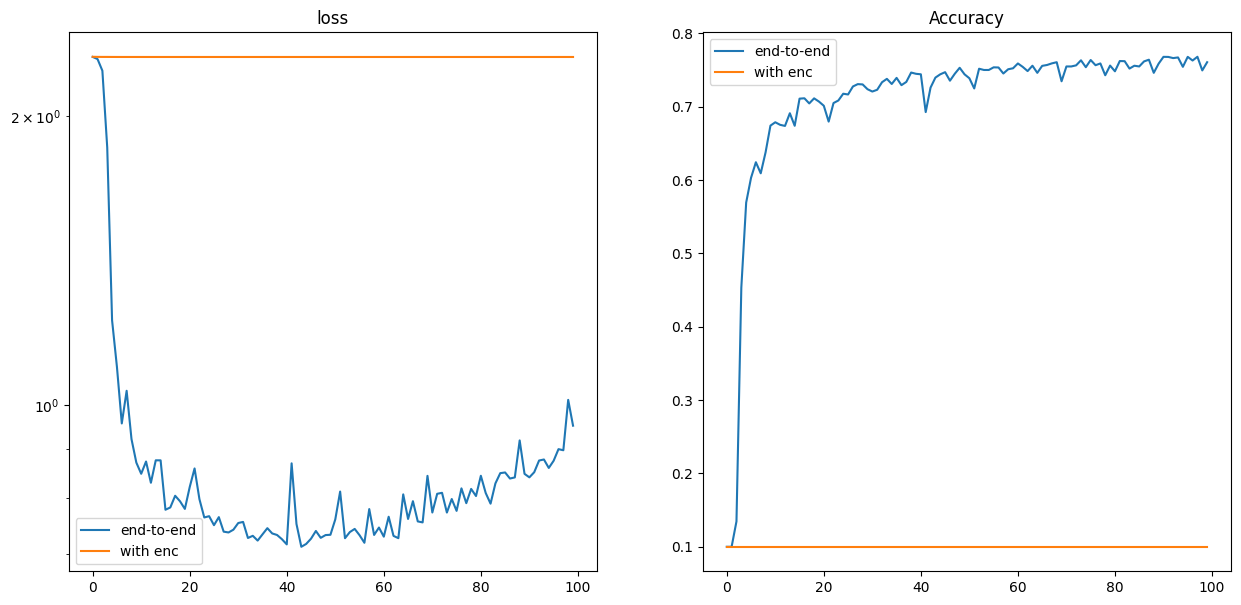

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].plot(val_losses_full, label="end-to-end")
axs[0].plot(val_losses_enc, label="with enc")
axs[0].set_yscale("log")
axs[0].set_title("loss")
axs[0].legend()

axs[1].plot(val_accs_full, label="end-to-end")
axs[1].plot(val_accs_enc, label="with enc")
axs[1].set_title("Accuracy")
axs[1].legend()